<a href="https://colab.research.google.com/github/choki0715/UnLiteFlowNet-PIV/blob/master/NIA95_AIDEN_%EC%83%81%EC%B7%A8%EC%9B%90_%EC%9B%90%EC%B2%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_summary_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 불러오기
#import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm # 그래프 한글 font 로딩.

import numpy as np
import pandas as pd
import glob
#from sklearn.model_selection import train_test_split  # <- split 사용 확인 필요.
import time
from datetime import datetime
import unicodedata  #<---------- 유니코드 문자열 정의 모듈. : 필요한지 확인 필요.
#import re           #<---------- 정규식처리를 위한 모듈 : 필요한지 확인 필요. 
import os 
import io
import seaborn as sns
import IPython
import IPython.display
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['axes.grid'] = False

# -*- coding: utf-8 -*-

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_wl = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수위_241.csv', encoding='cp949')
# df_wq = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/관측소1개_샘플(20220914)/국가_수질_241.csv', encoding='cp949')

# df_wq_10p = pd.read_csv('/content/drive/MyDrive/NIA 2차 수질예측 프로젝트/NIA_AIDEN_06_(지하수)/1cycle_수집_(10%)/국가_수질_데이터셋.zip (Unzipped Files)/국가_수질_가평가평_2224.csv', encoding='cp949')

# df_sfw_namkang = pd.read_csv('/content/drive/MyDrive/NIA_AIDEN_01_(상-취수원)/비전21테크_10%데이터 남강,영천(20220914)/³²°­´ï_2020_110_3689280.csv', header = 1) #, encoding='cp949')
in_path = '/content/drive/MyDrive/NIA_AIDEN_02_(상-취수원)/month_11_new_meta/Type-1 (2022-11-10)/121_m/csv/'

### Here file name !!!!!!!!
input_file = 'AI-095-1_121_C026_m.csv'
#data = pd.read_csv(in_path + input_file, header = 1, encoding='cp949')
data = pd.read_csv(in_path + input_file)
data

,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn,temp,precipitation,wind_velocity
0,C026,2020-01-01 0:00,4.6960,197.9000,7.3864,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.5,0.0,4.0
1,C026,2020-01-01 0:01,4.6440,197.7000,7.3906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.5,0.0,4.0
2,C026,2020-01-01 0:02,4.6440,197.7000,7.3906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.4,0.0,4.5
3,C026,2020-01-01 0:03,4.7220,197.7000,7.3850,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.4,0.0,4.8
4,C026,2020-01-01 0:04,4.7220,197.7000,7.3850,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.3,0.0,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368960,C026,2022-08-08 16:00,1.1345,247.8125,7.2109,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,0.0,2.2
1368961,C026,2022-08-08 16:01,1.1315,245.5625,7.2083,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,0.0,1.0
1368962,C026,2022-08-08 16:02,1.1297,248.1250,7.2100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,0.0,1.7
1368963,C026,2022-08-08 16:03,1.1207,248.1250,7.2100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.1,0.0,2.5


new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_03


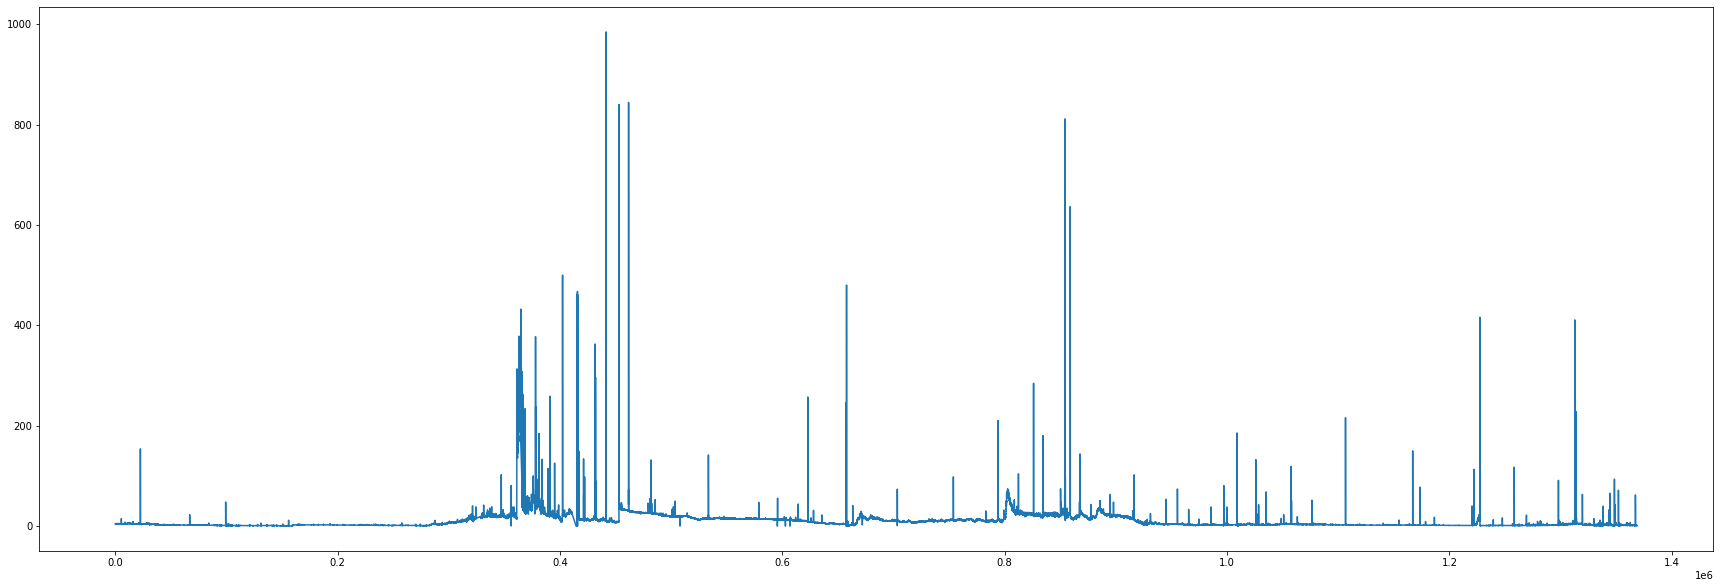

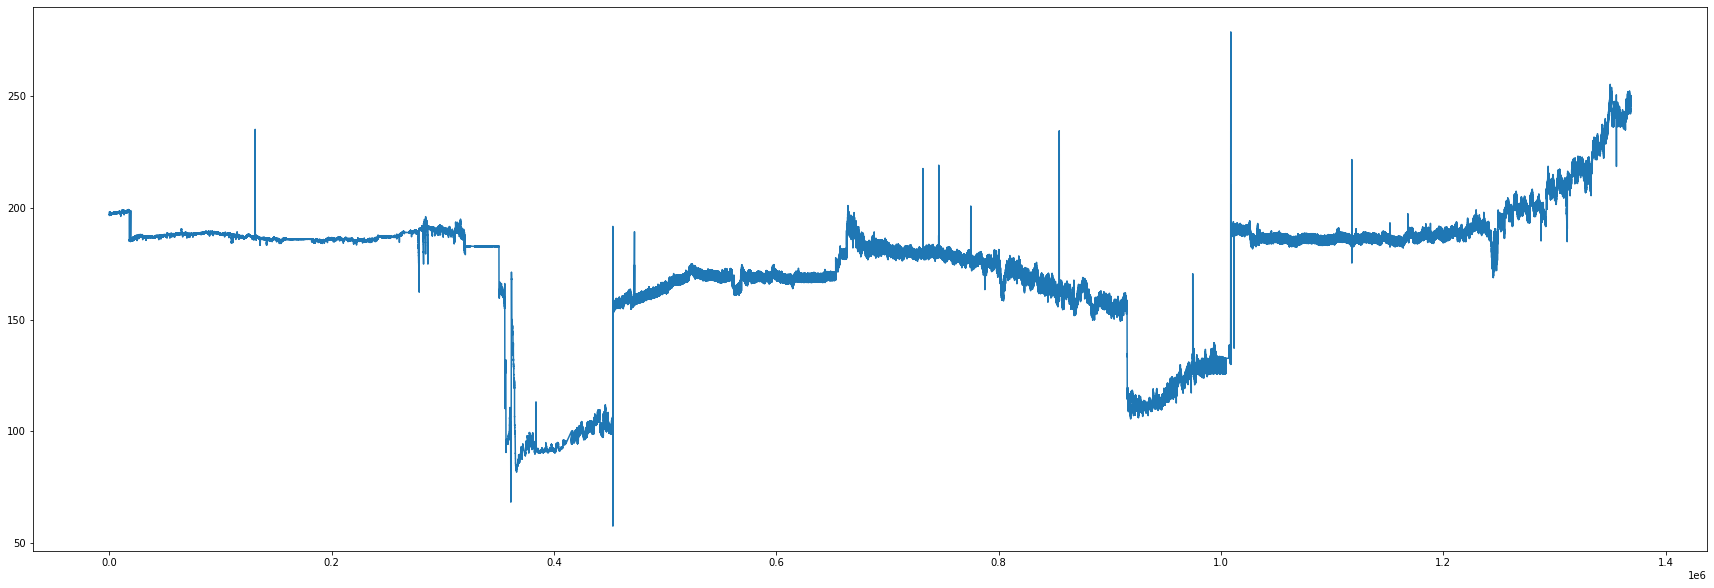

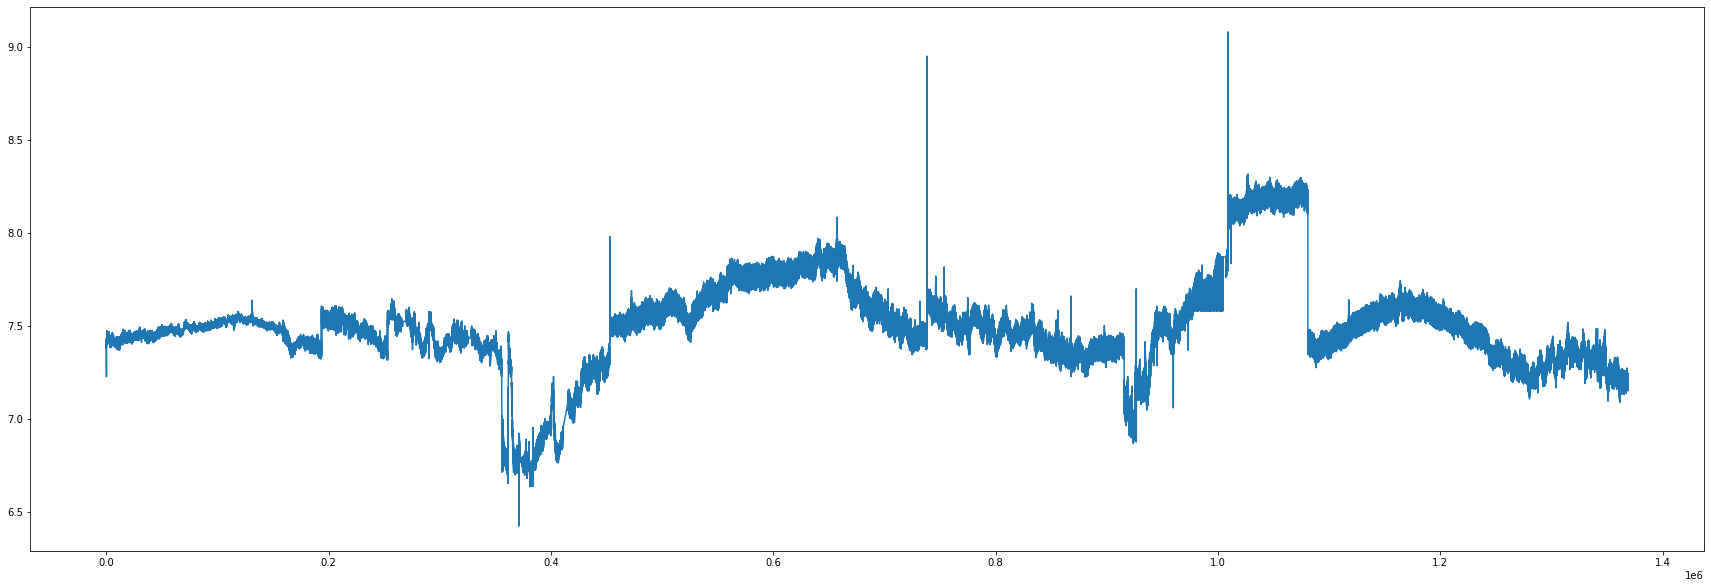

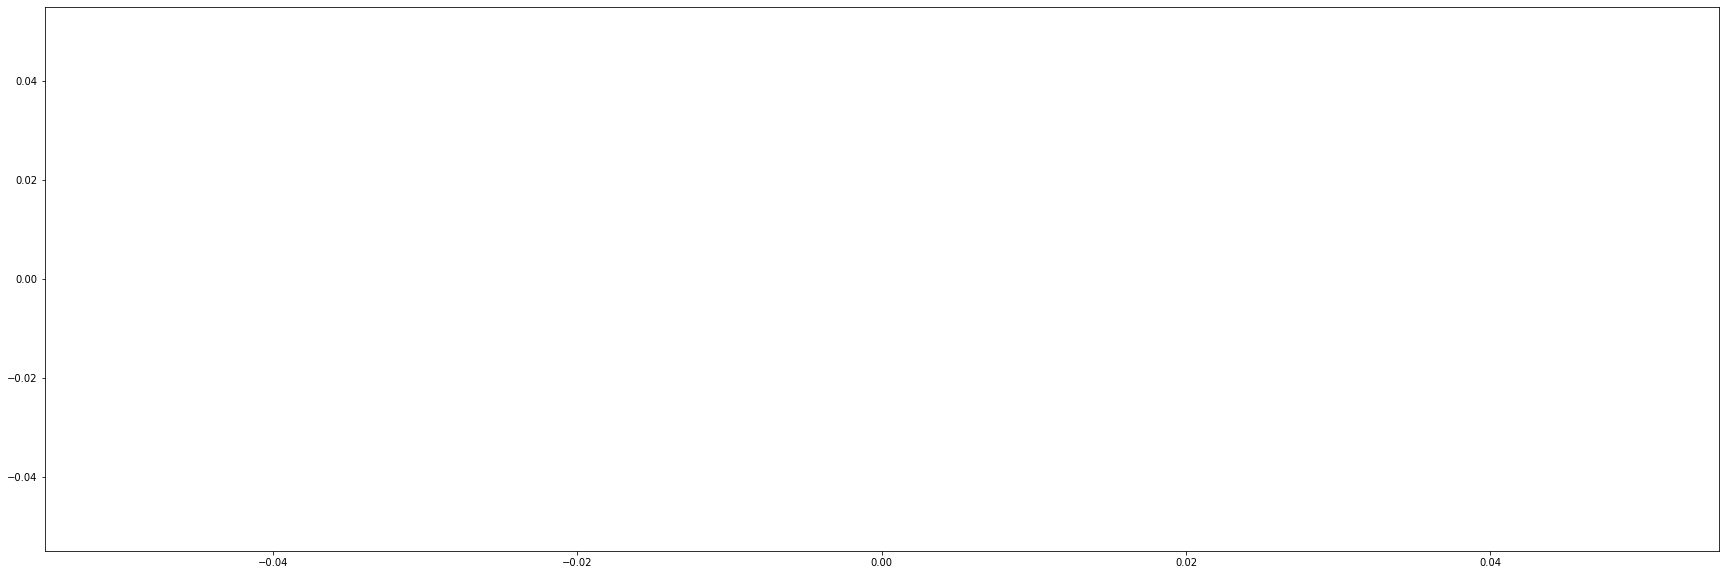

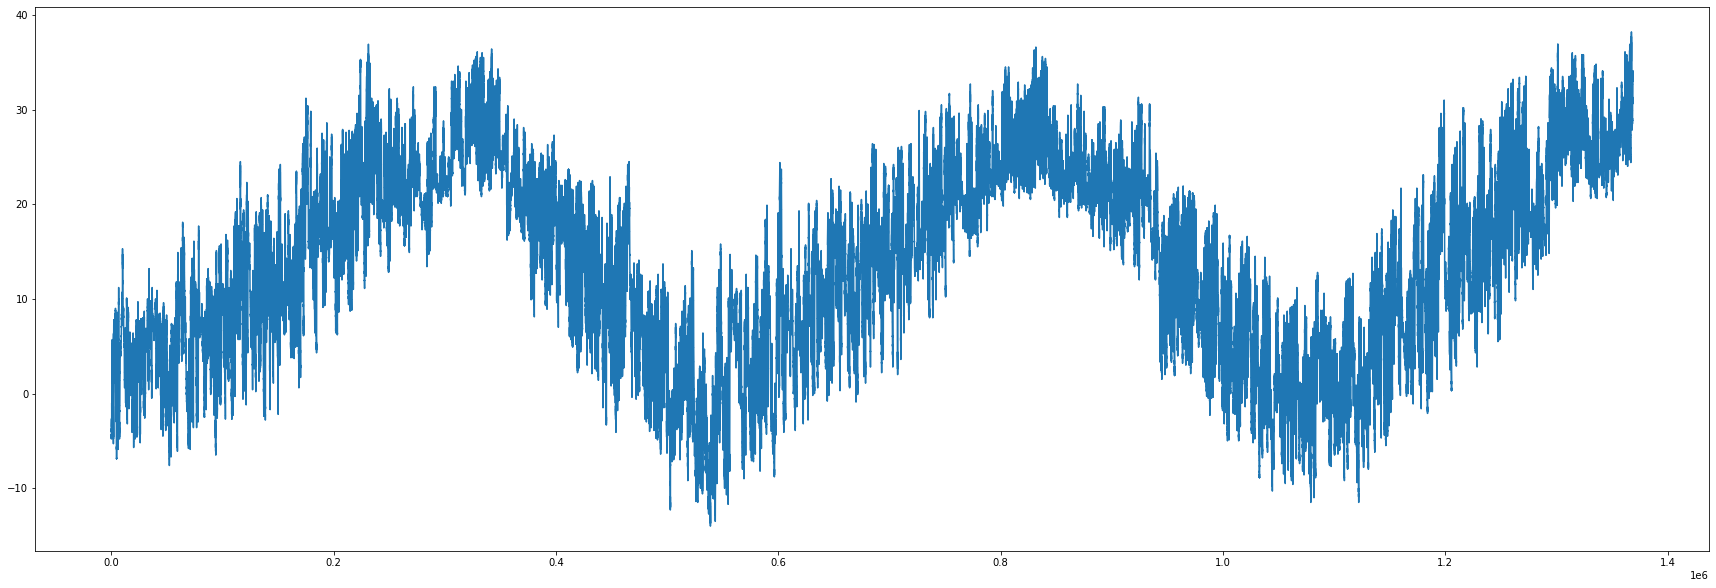

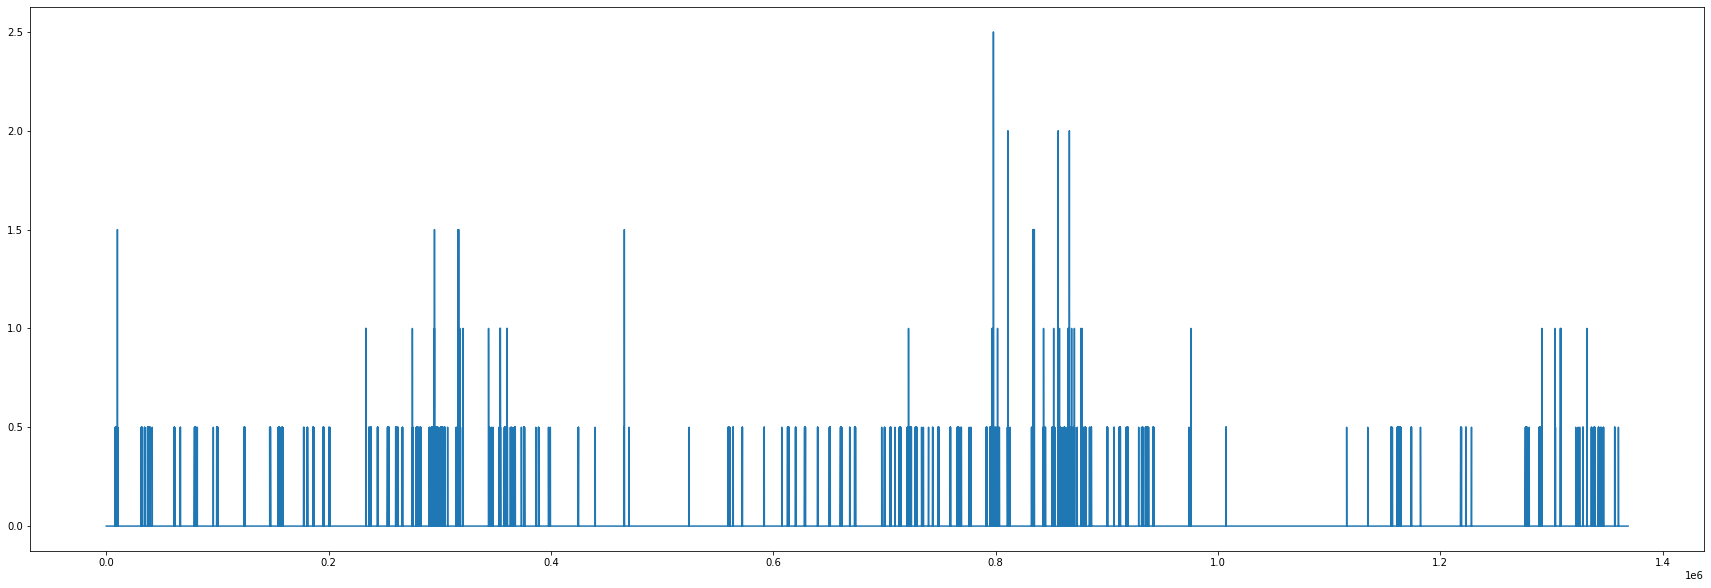

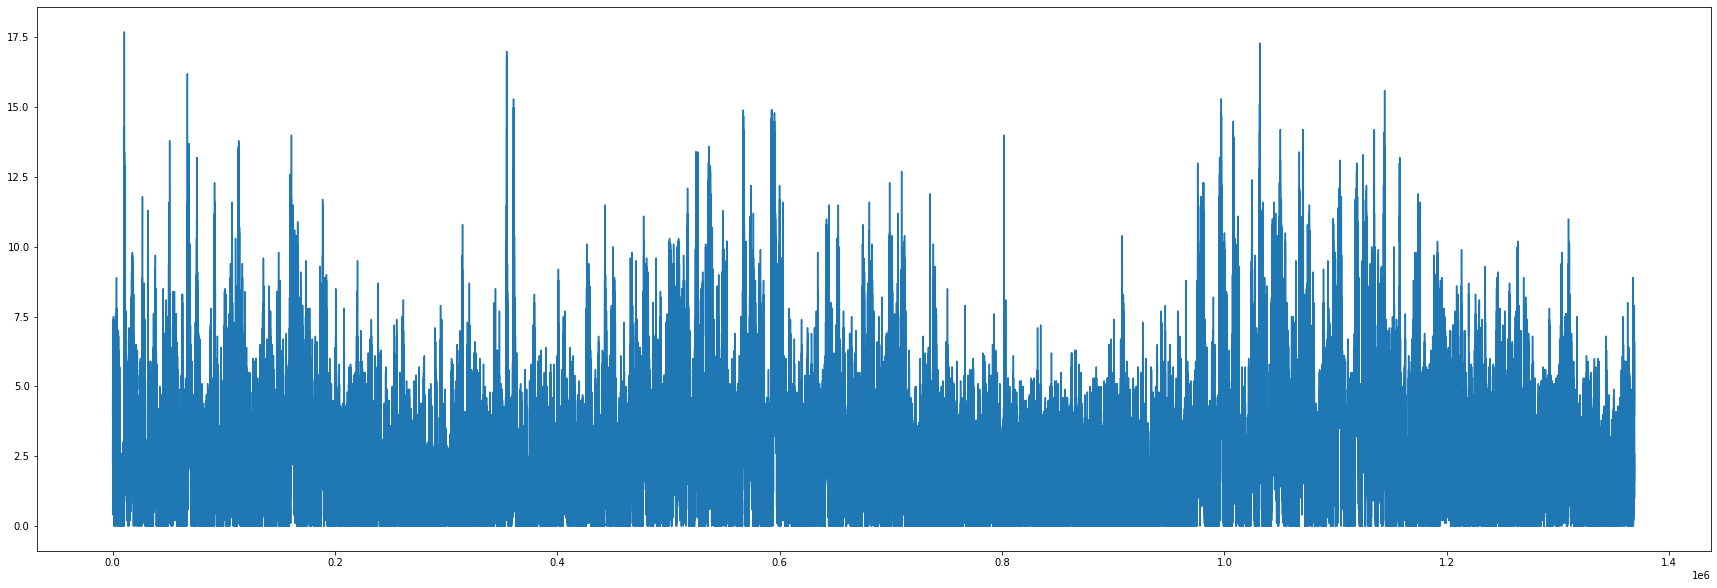

new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_17


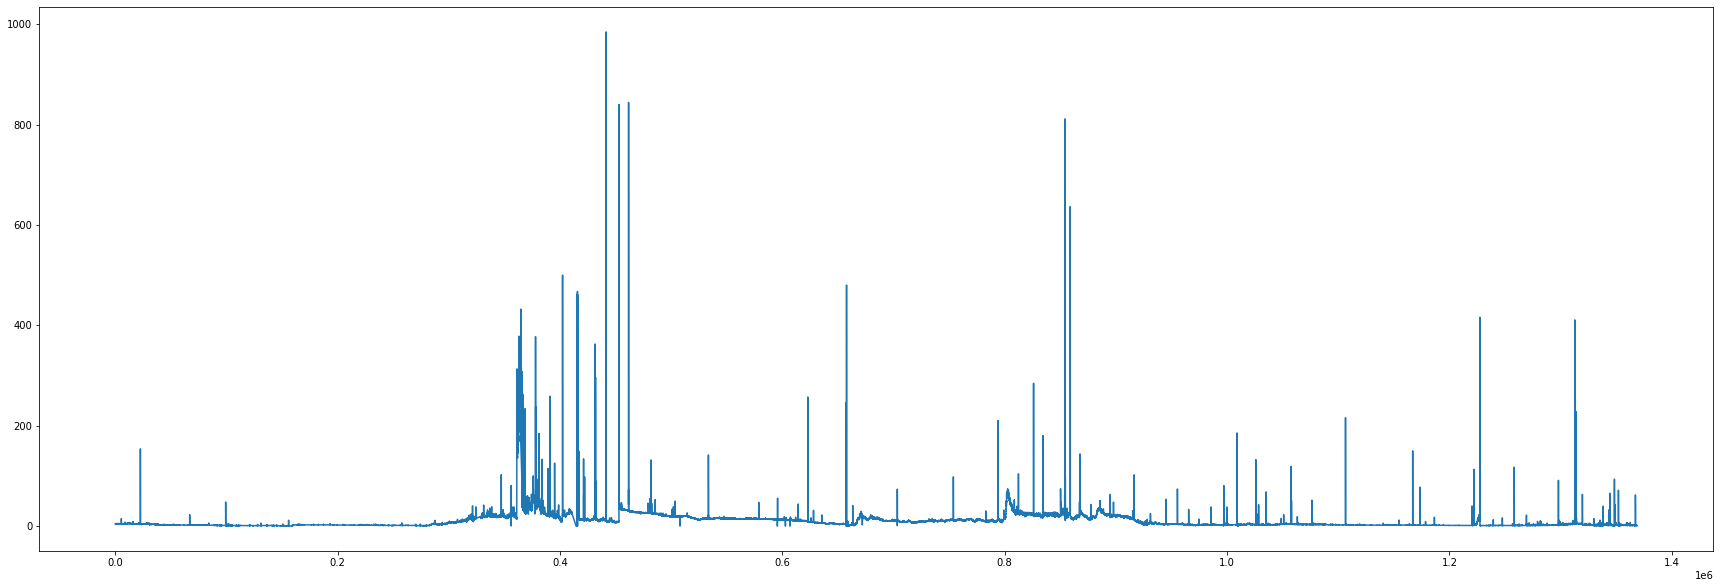

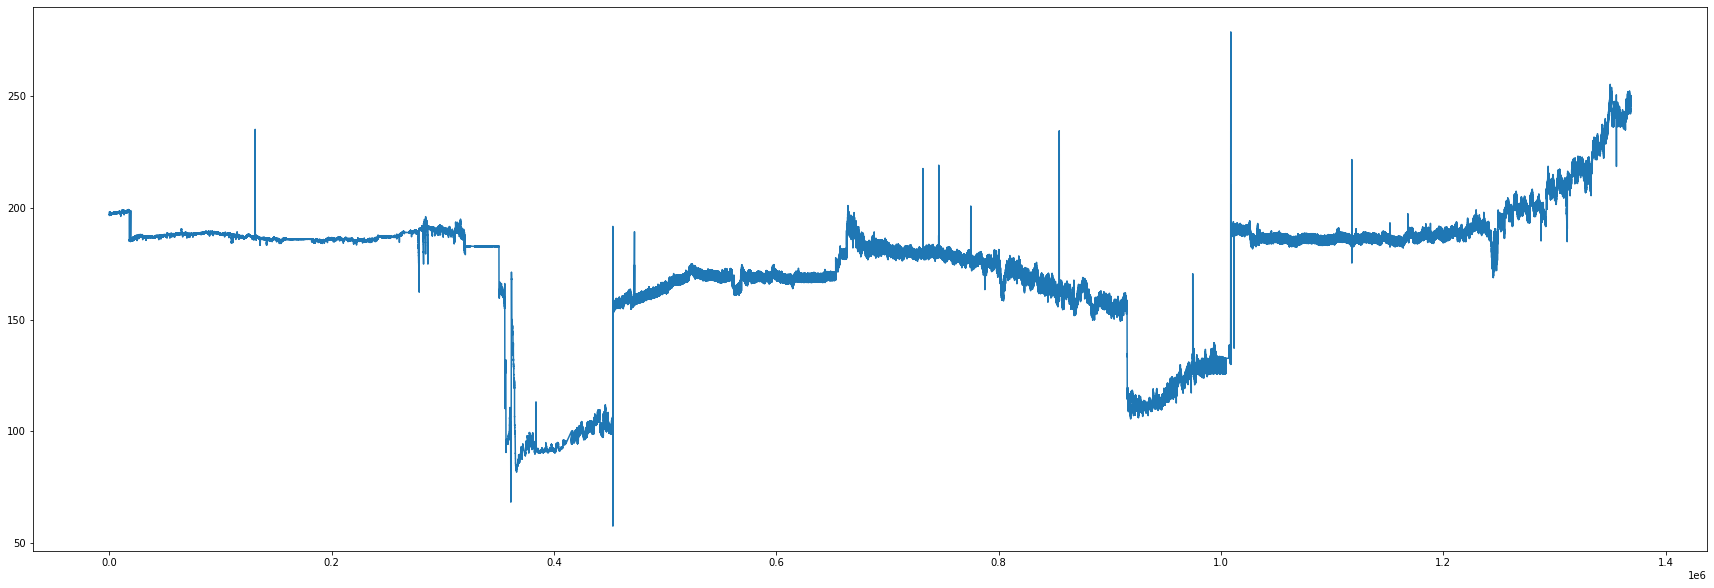

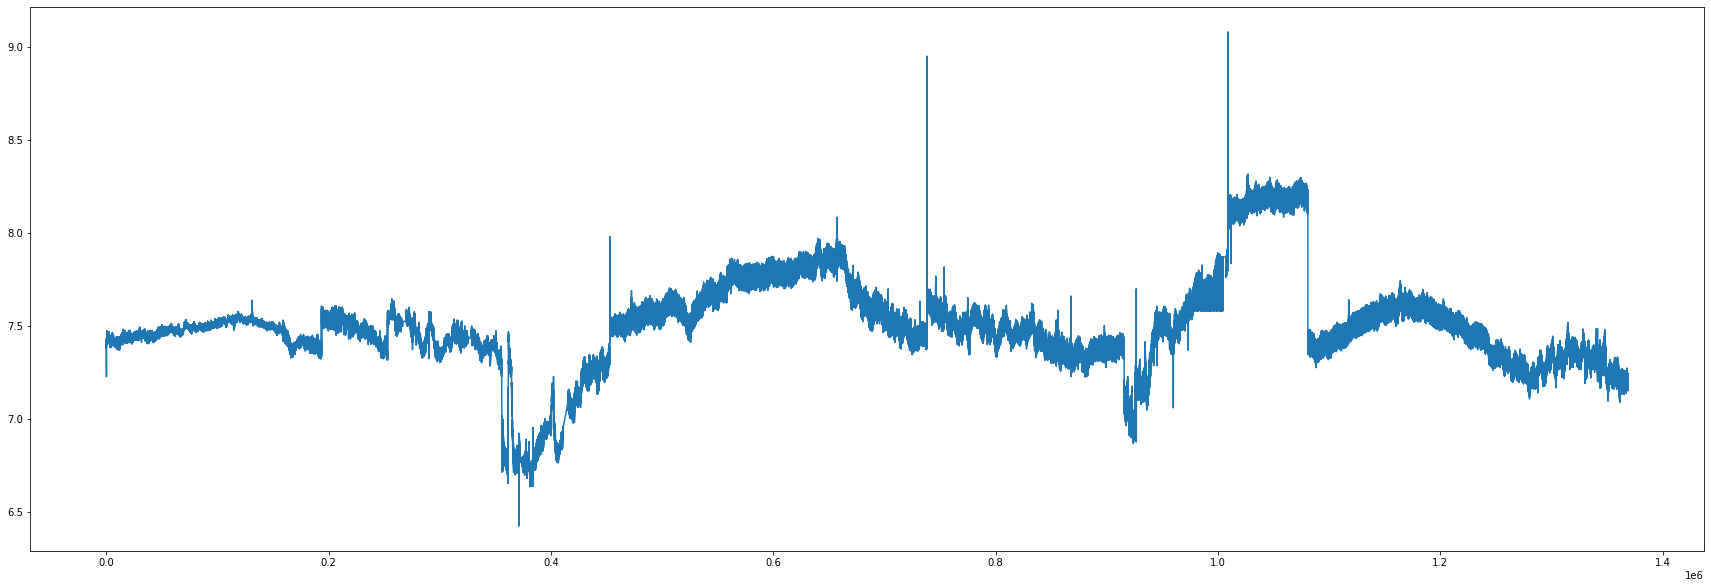

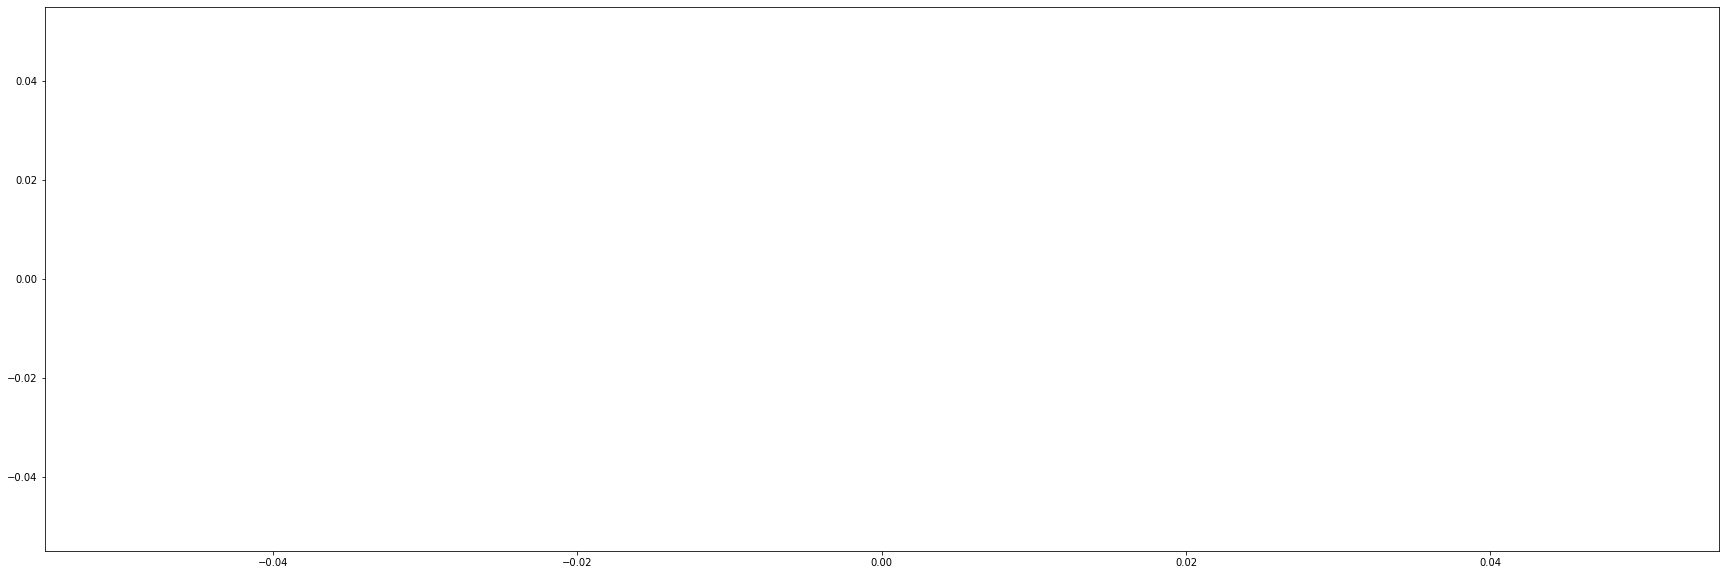

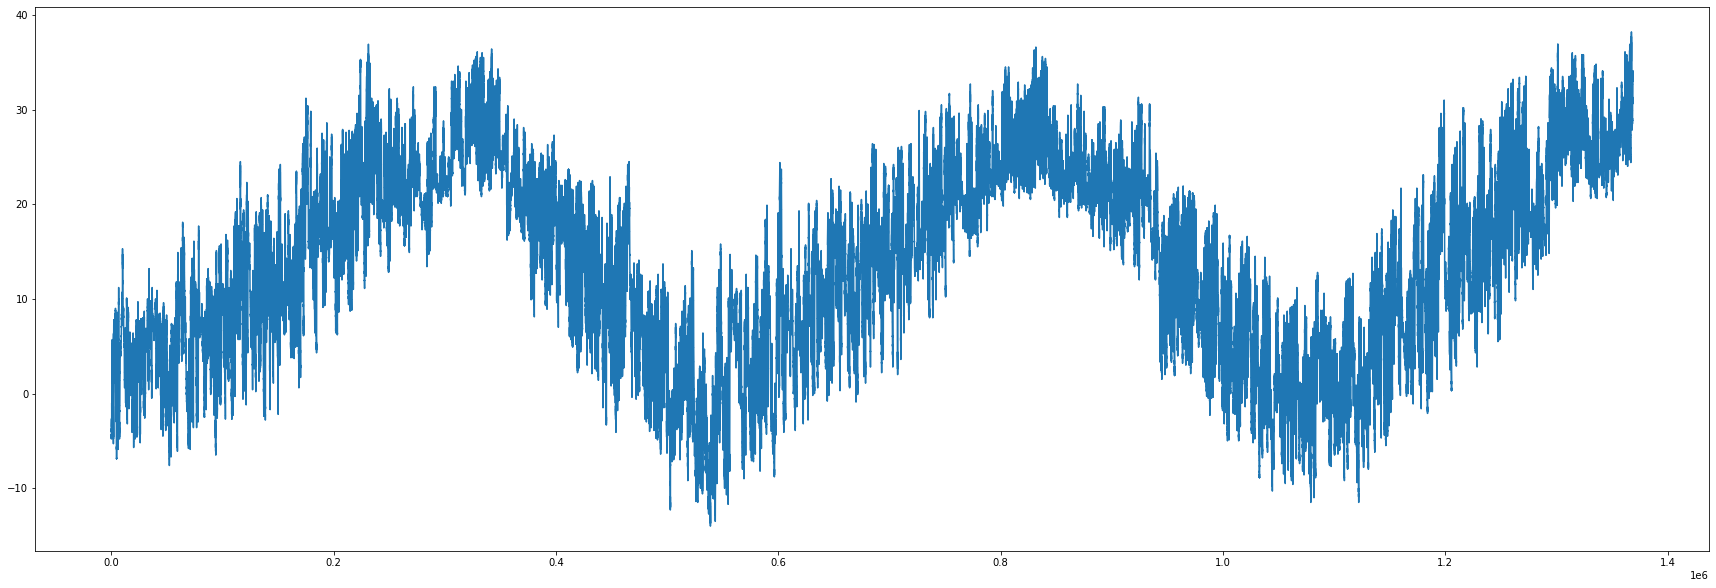

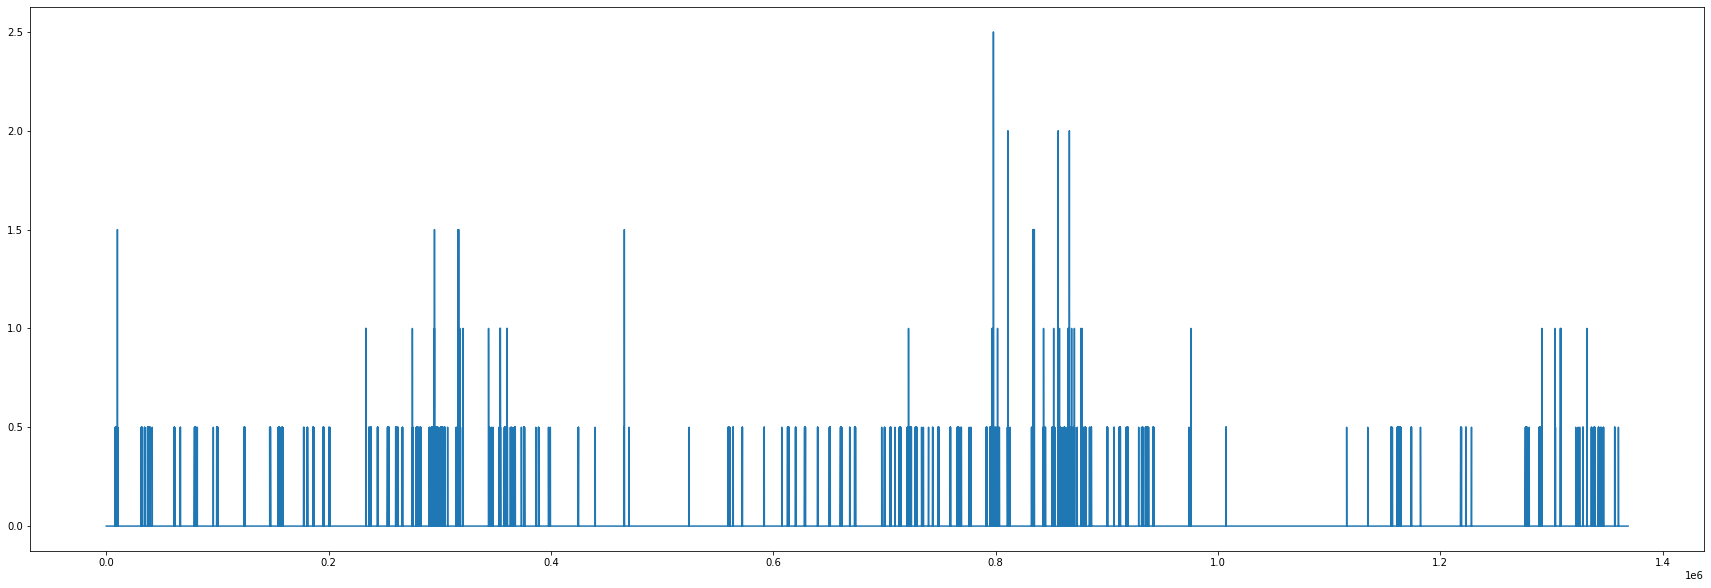

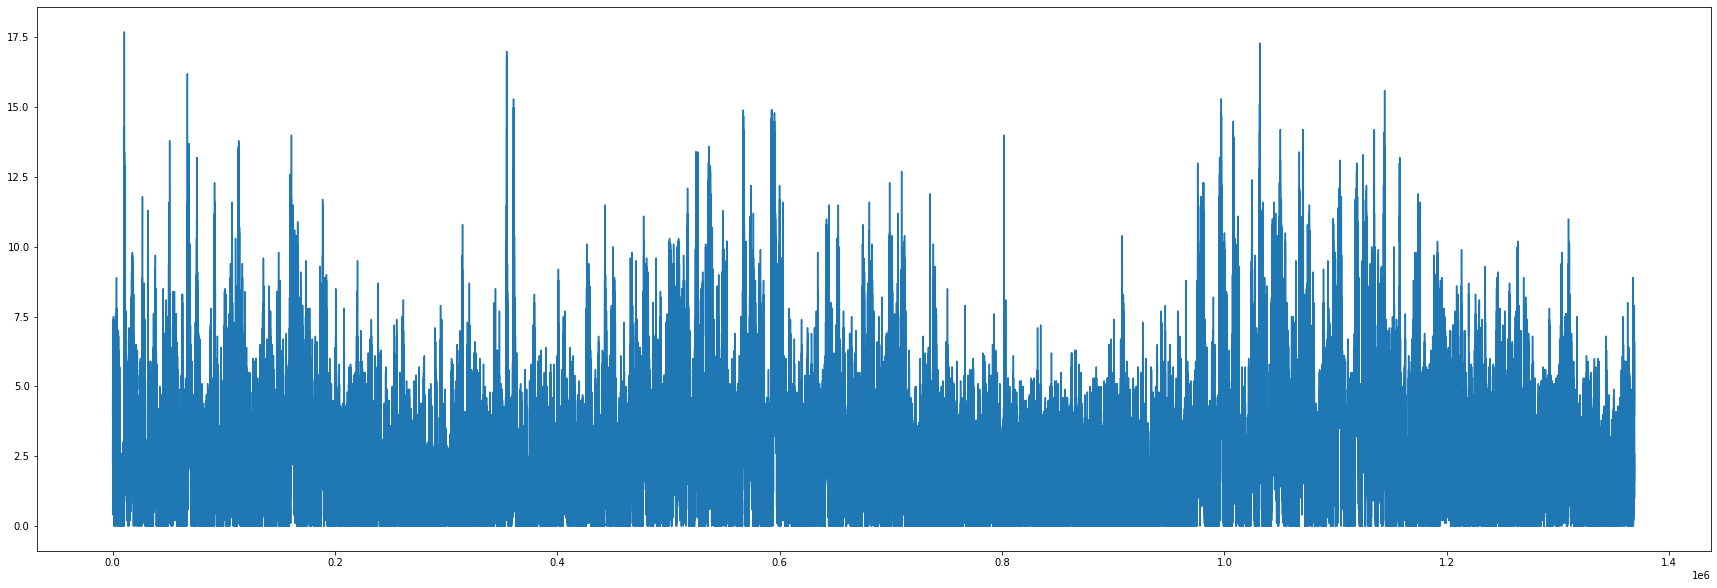

new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_06


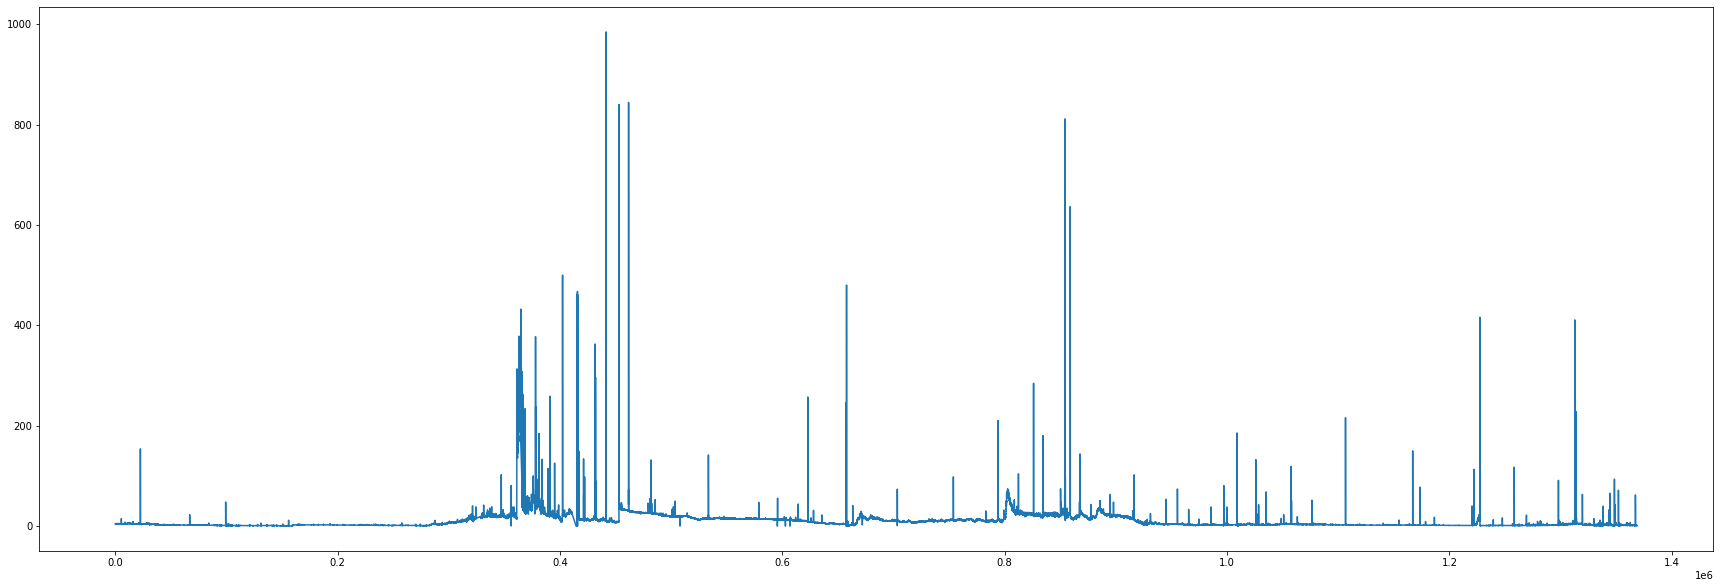

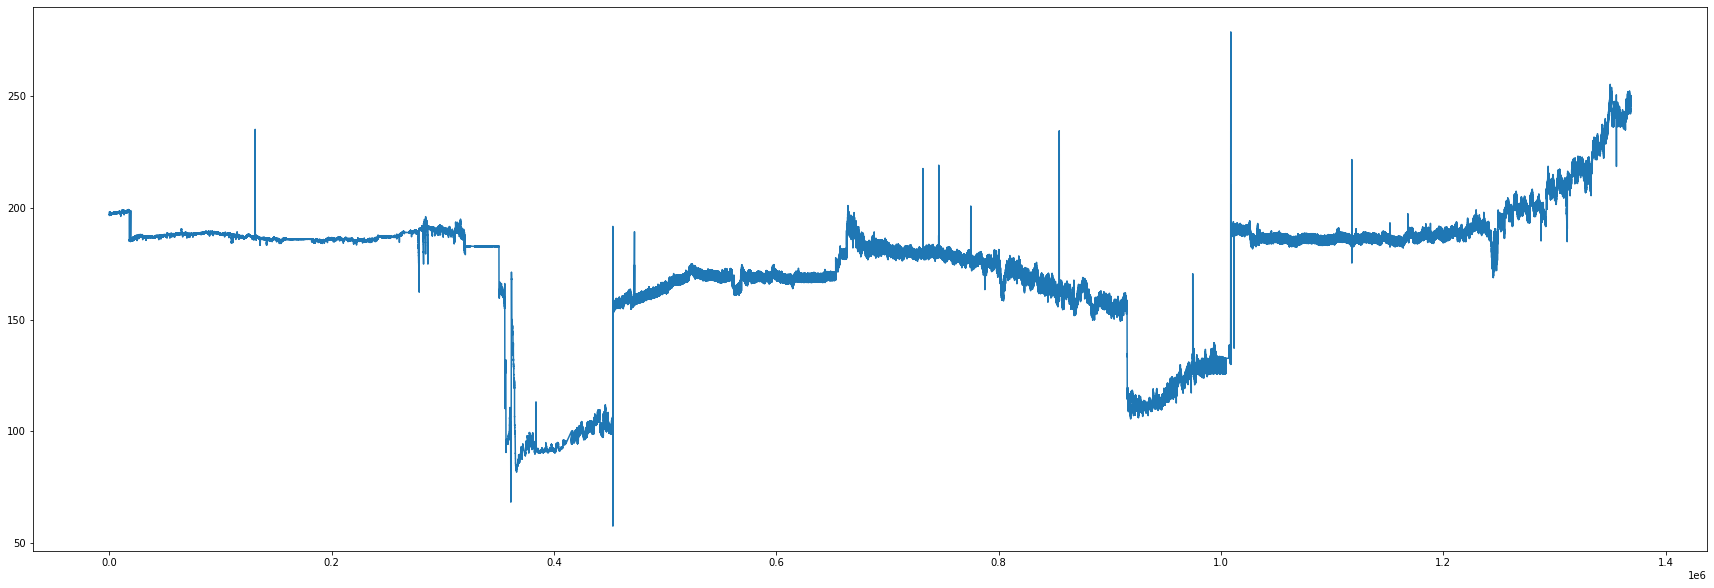

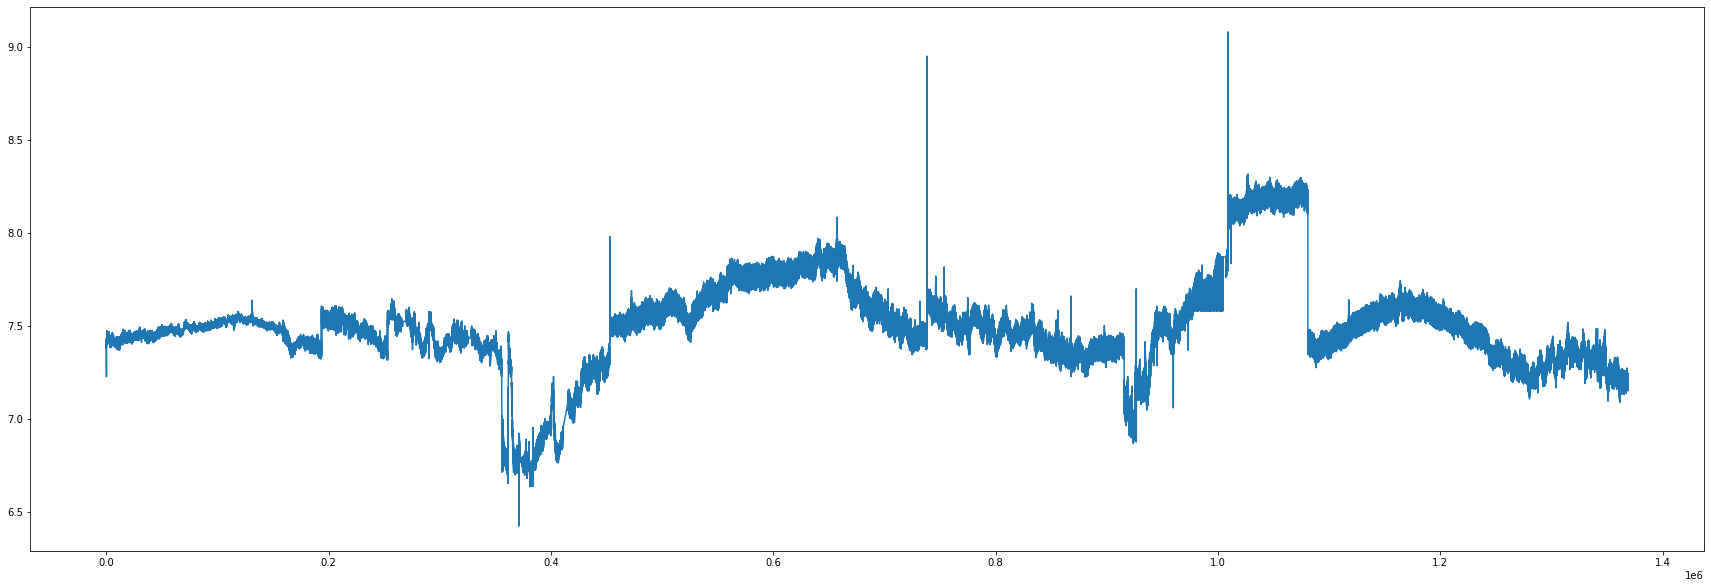

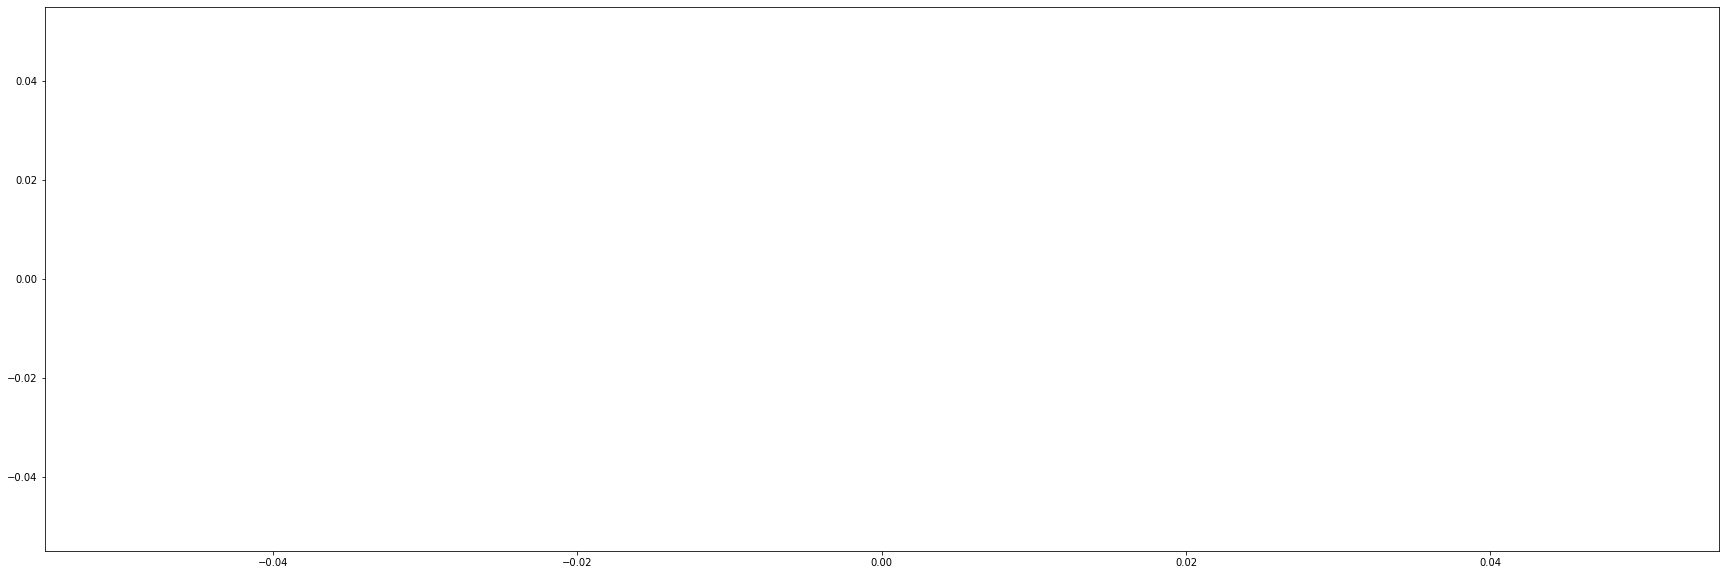

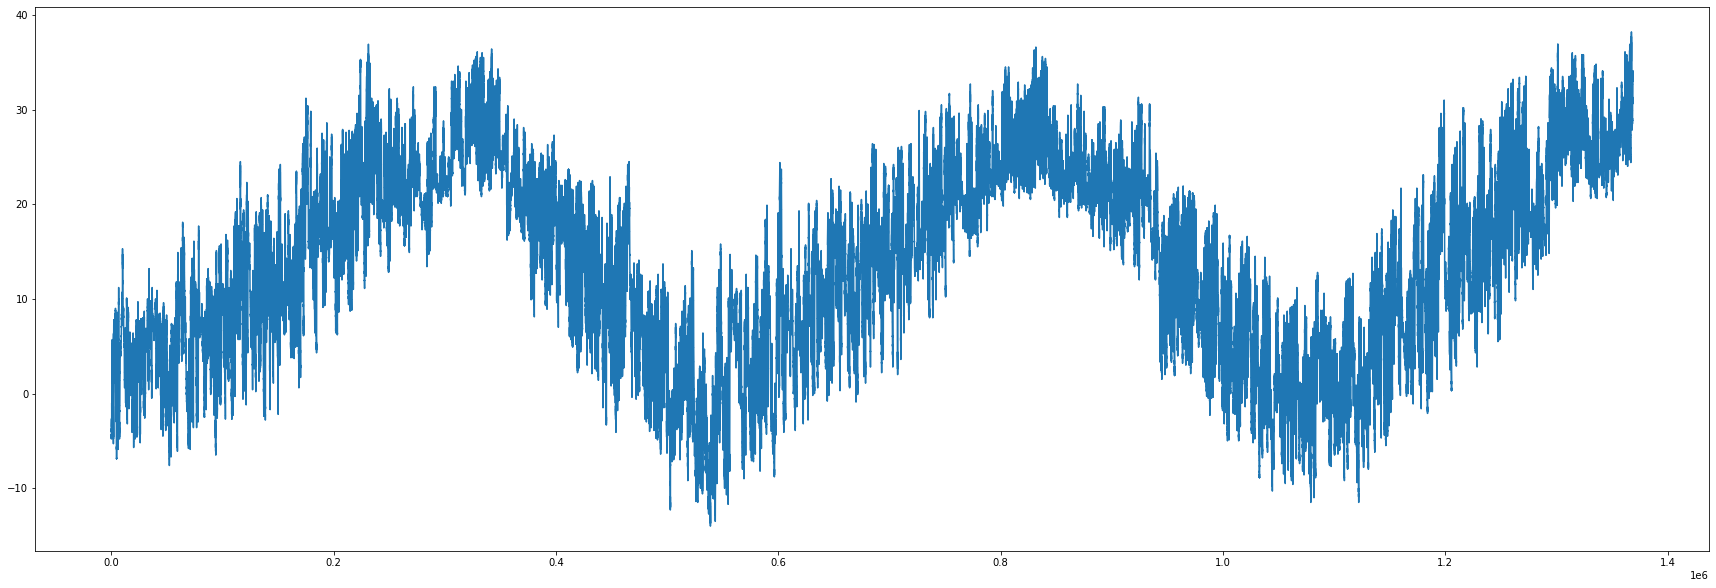

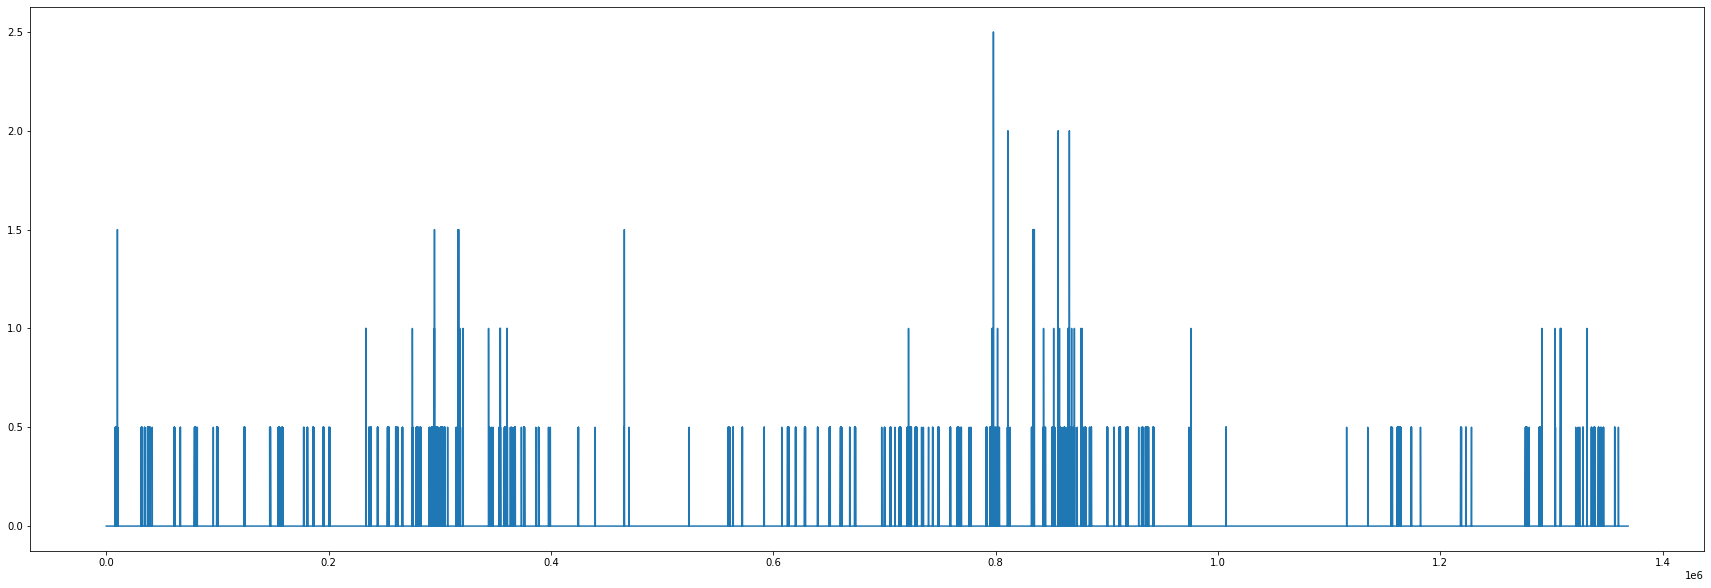

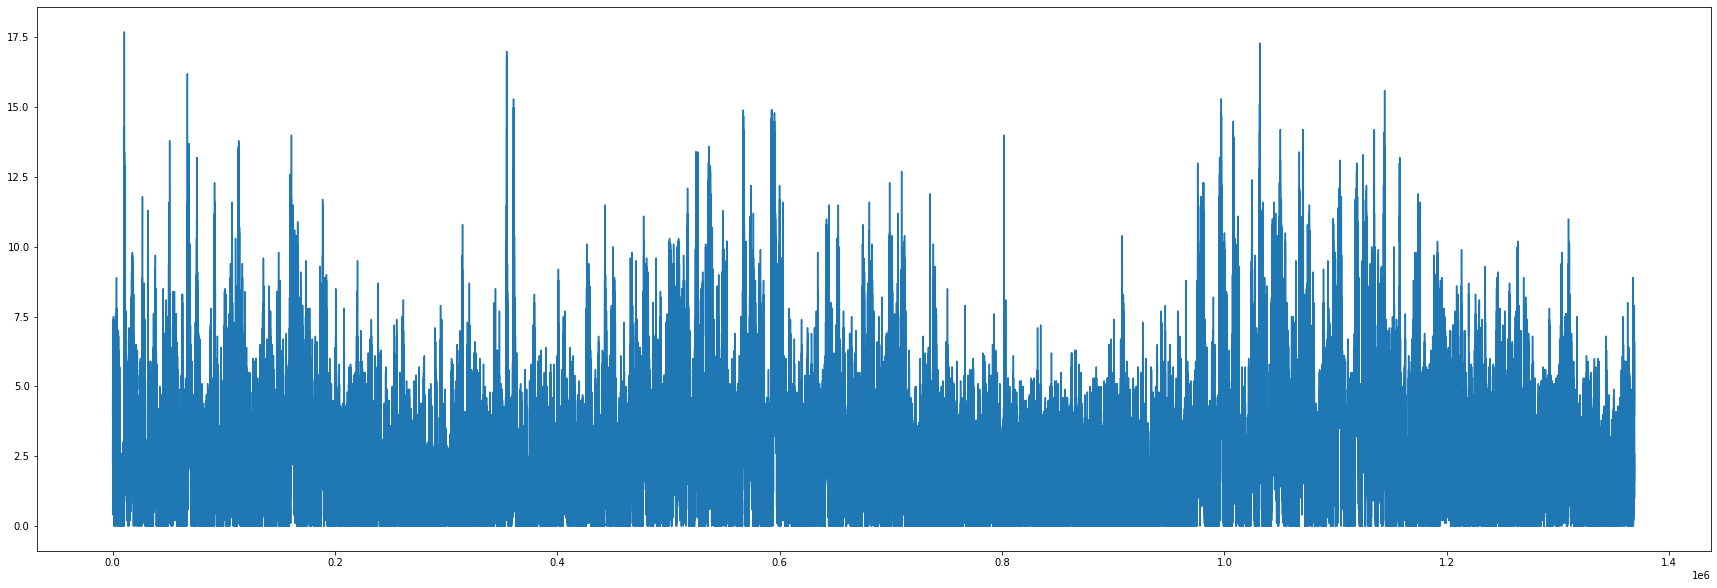

new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_14


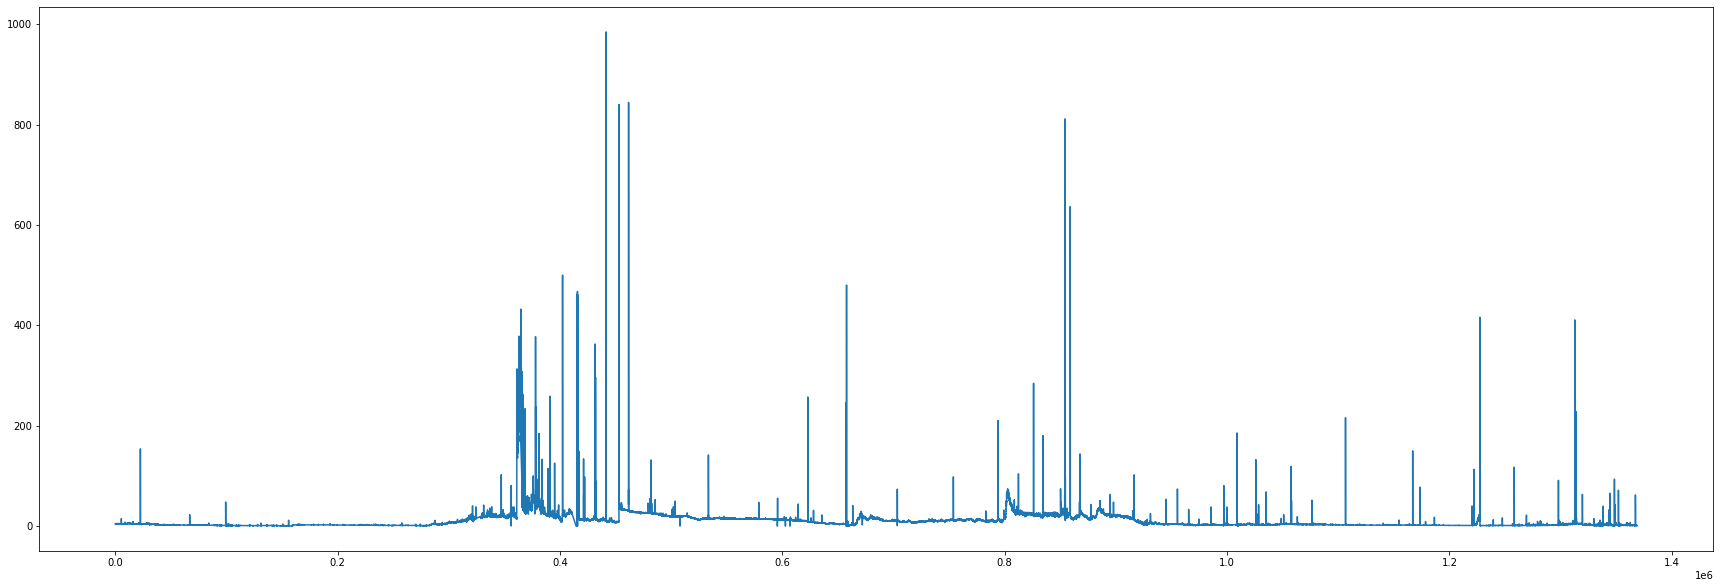

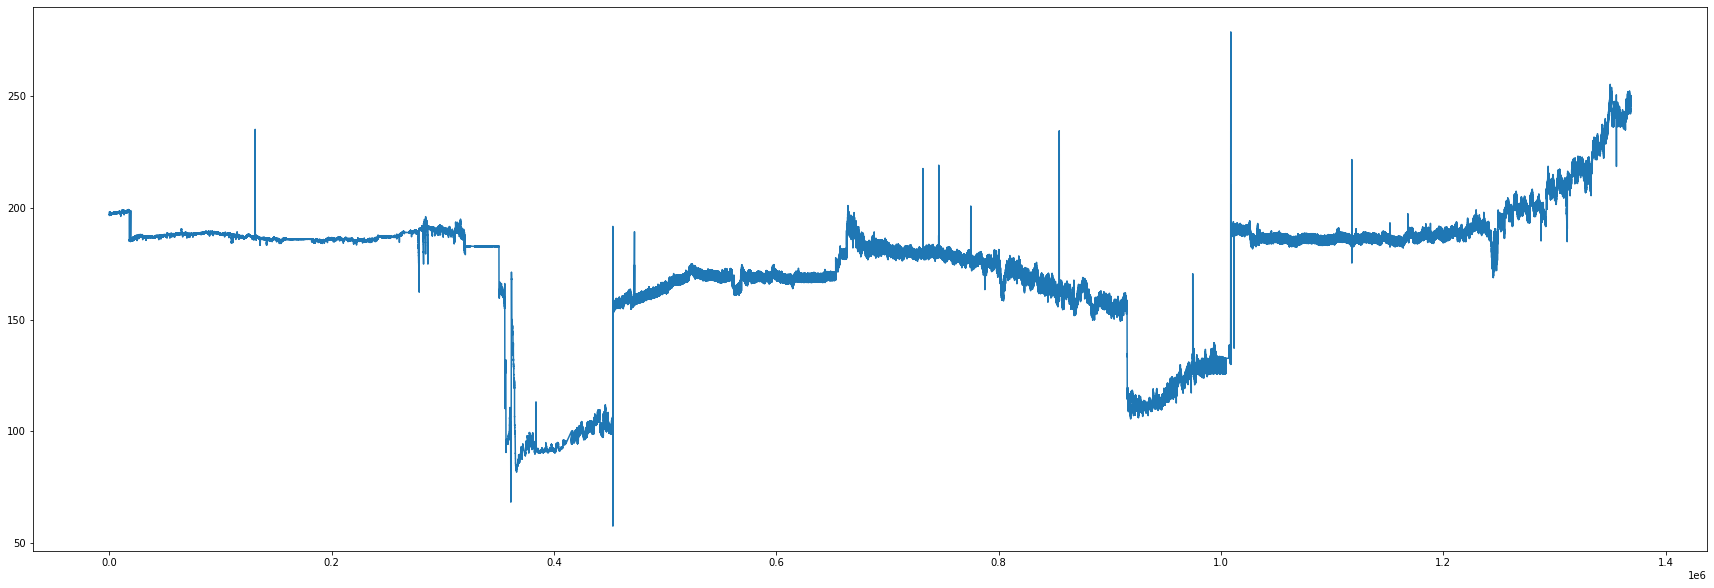

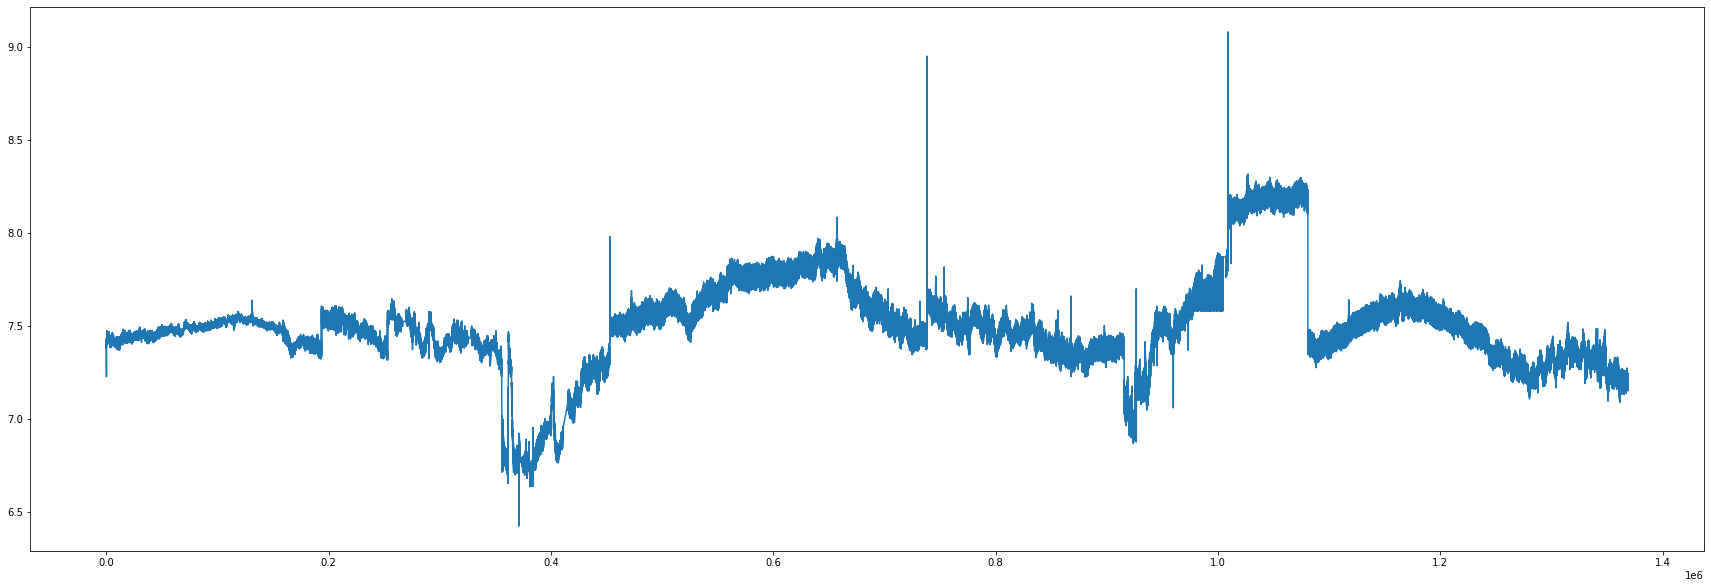

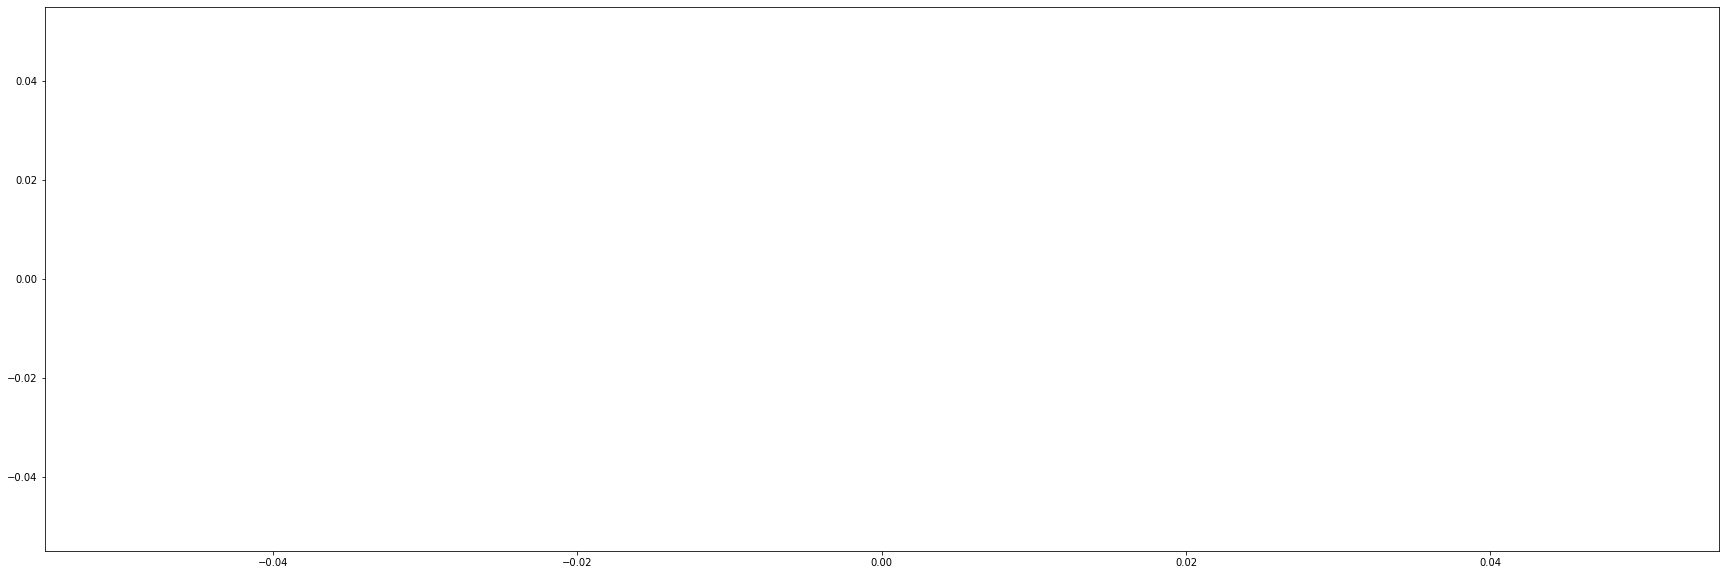

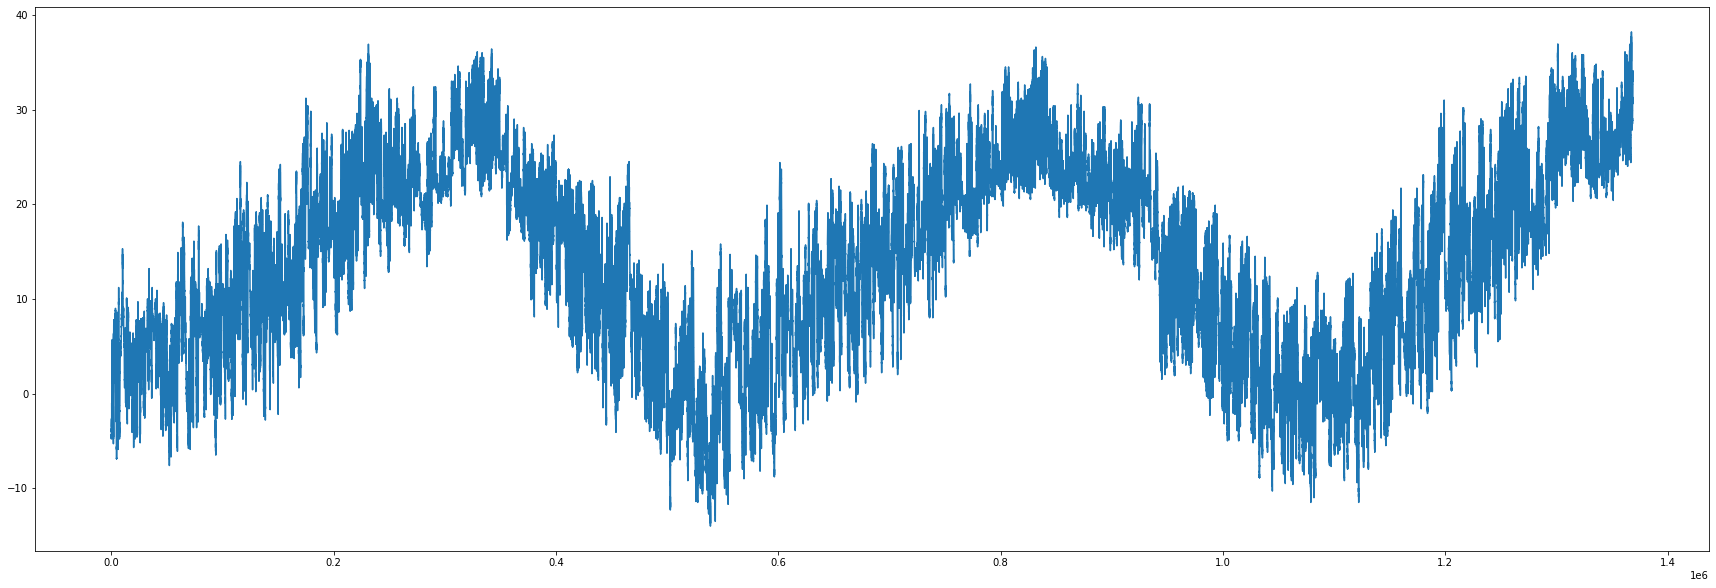

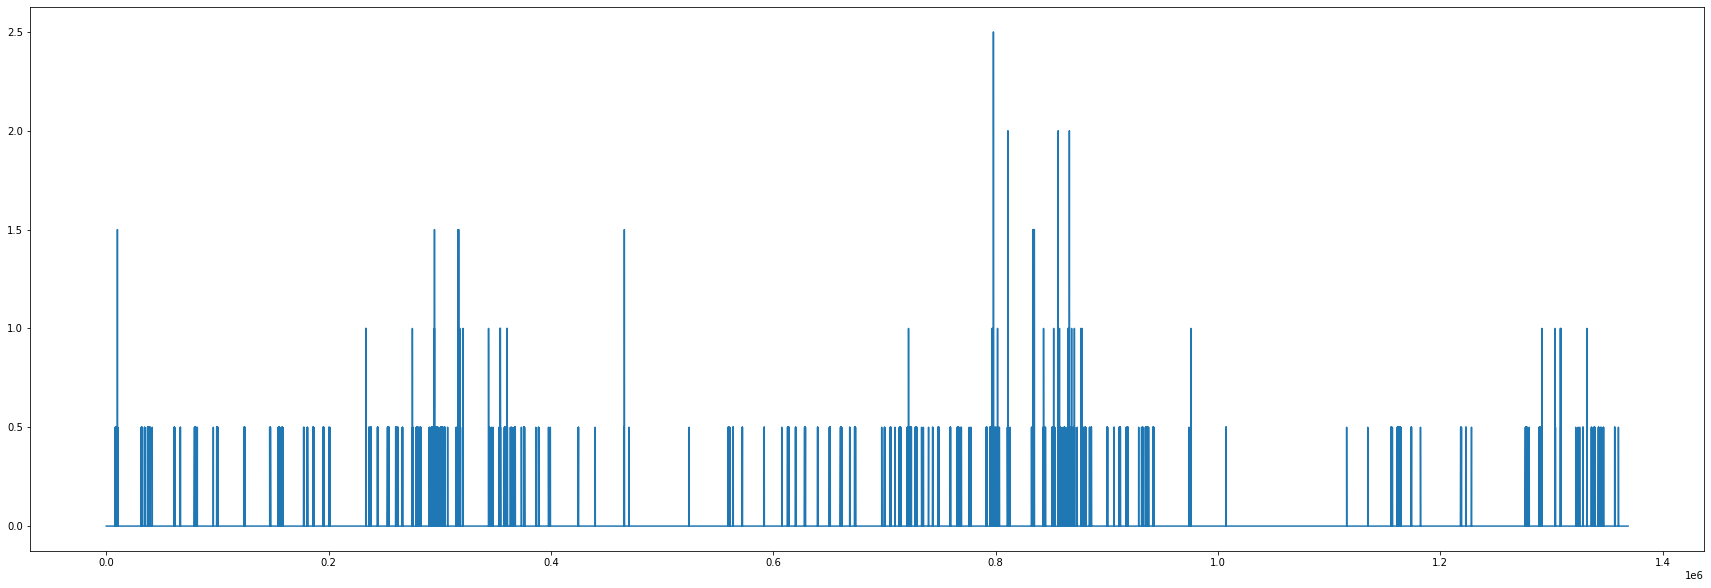

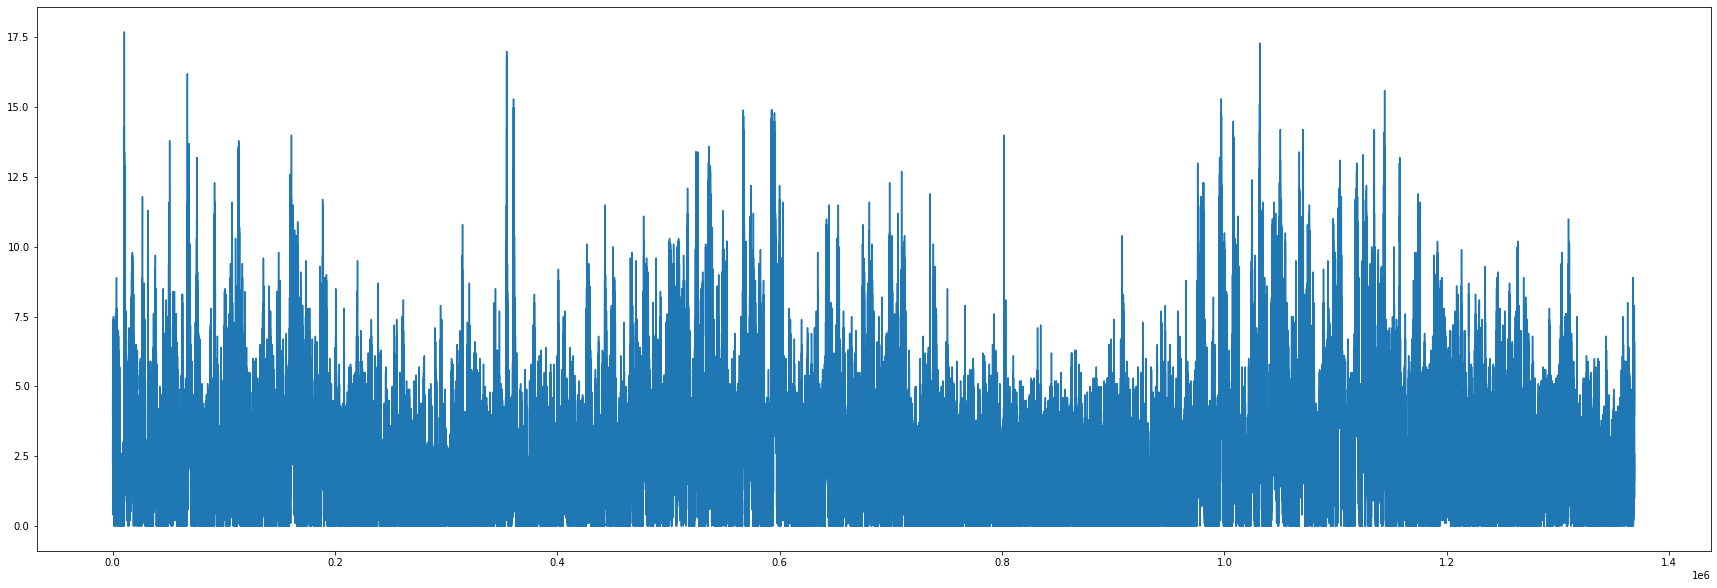

new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_08


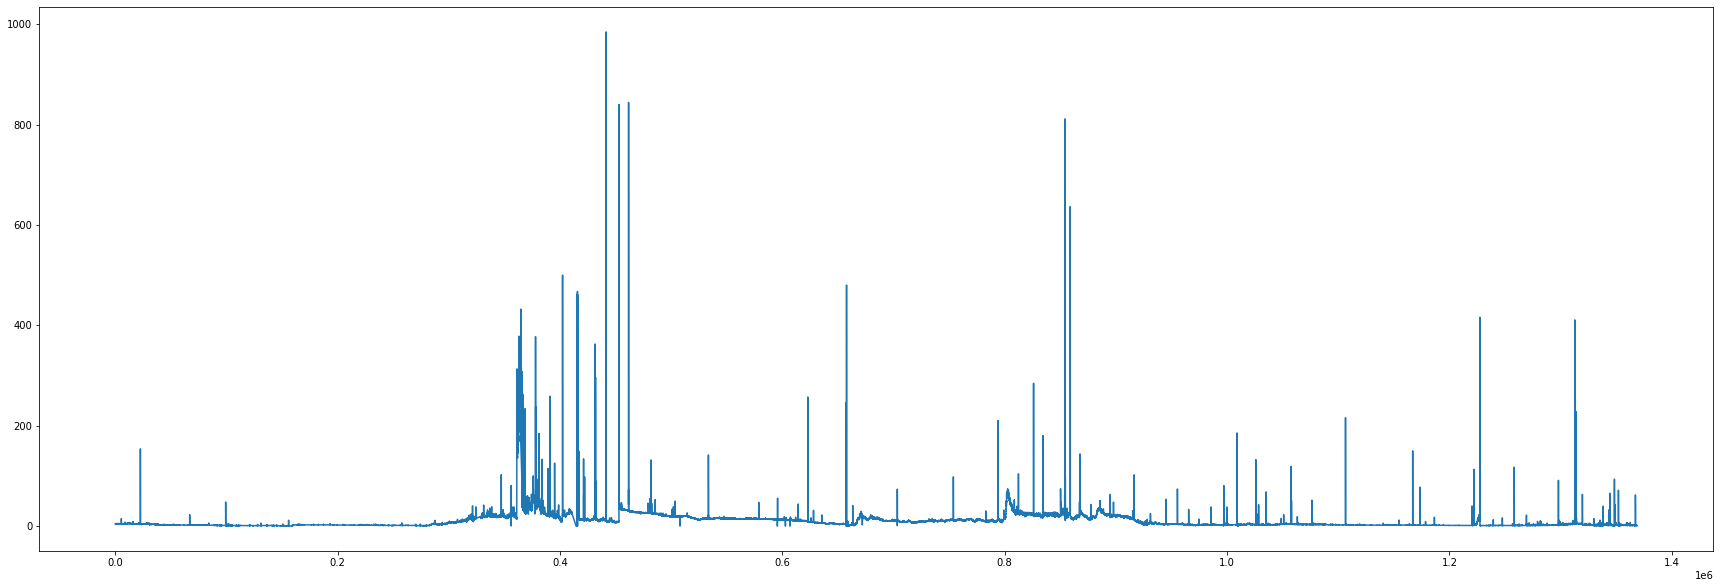

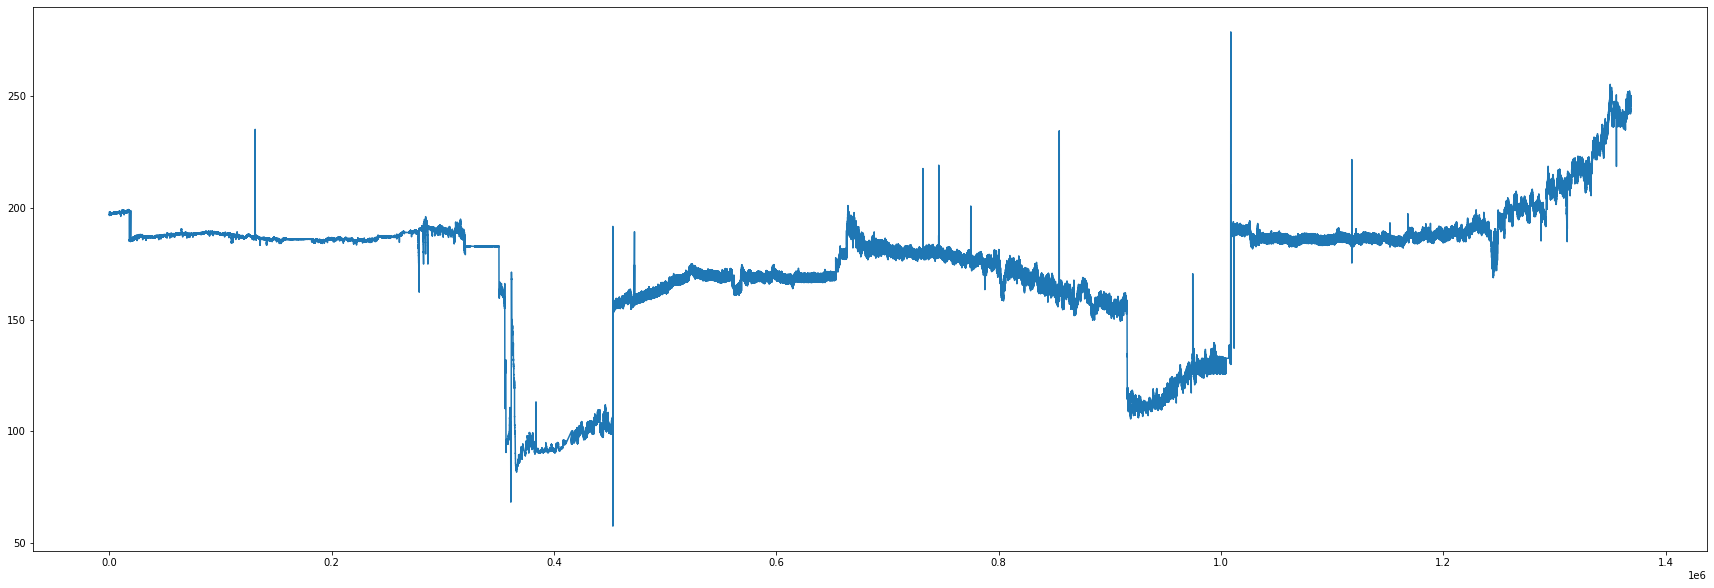

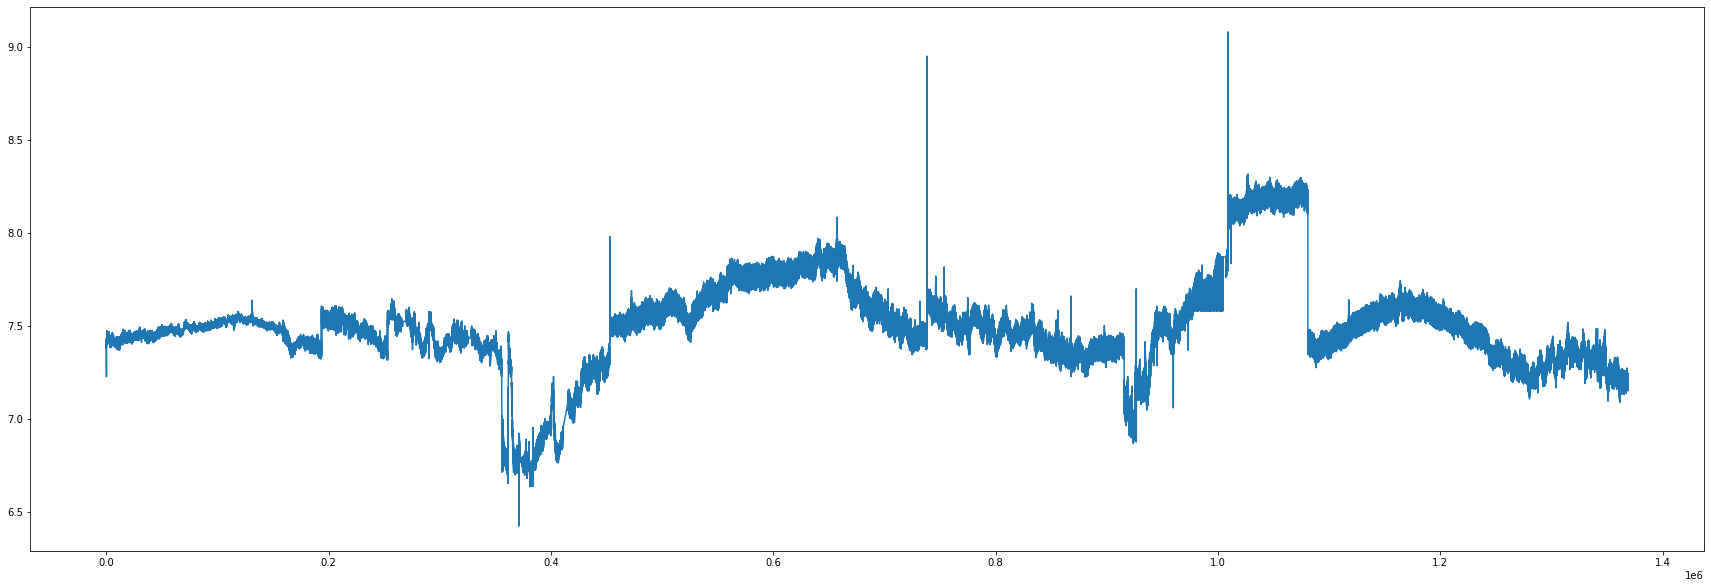

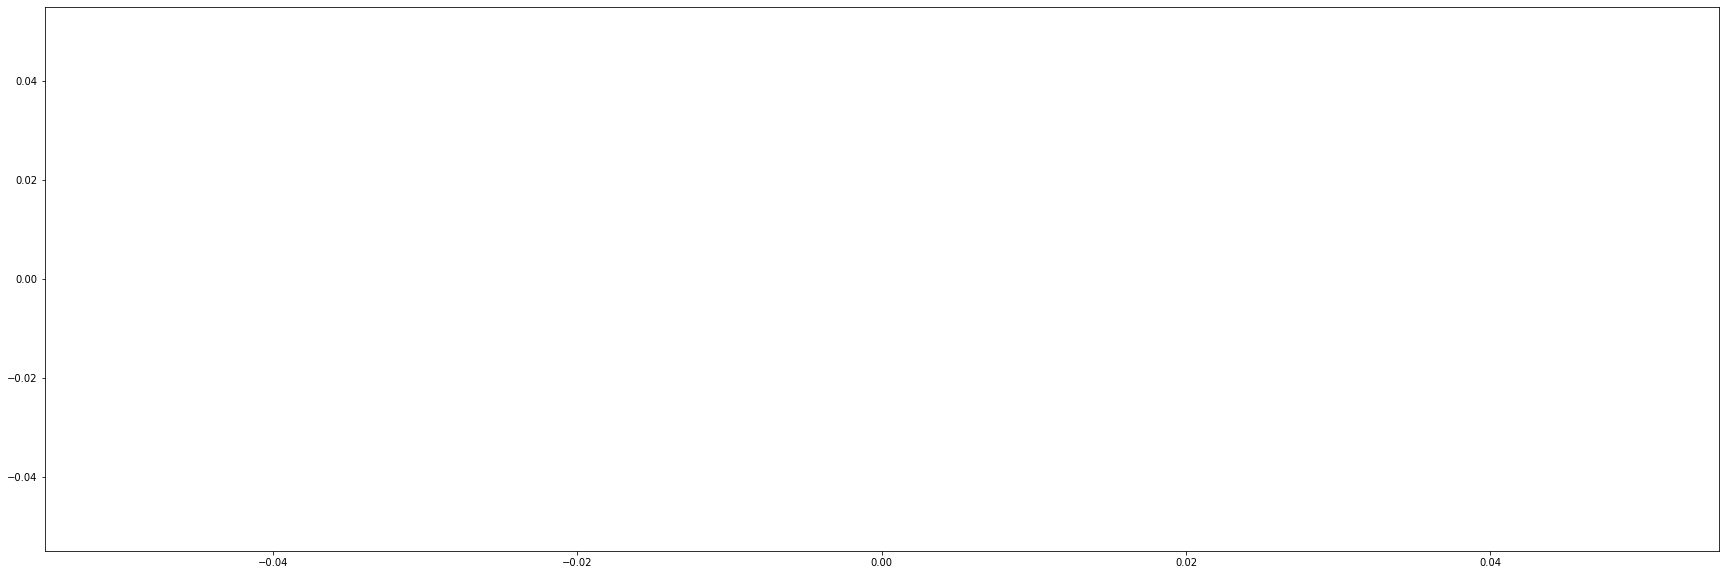

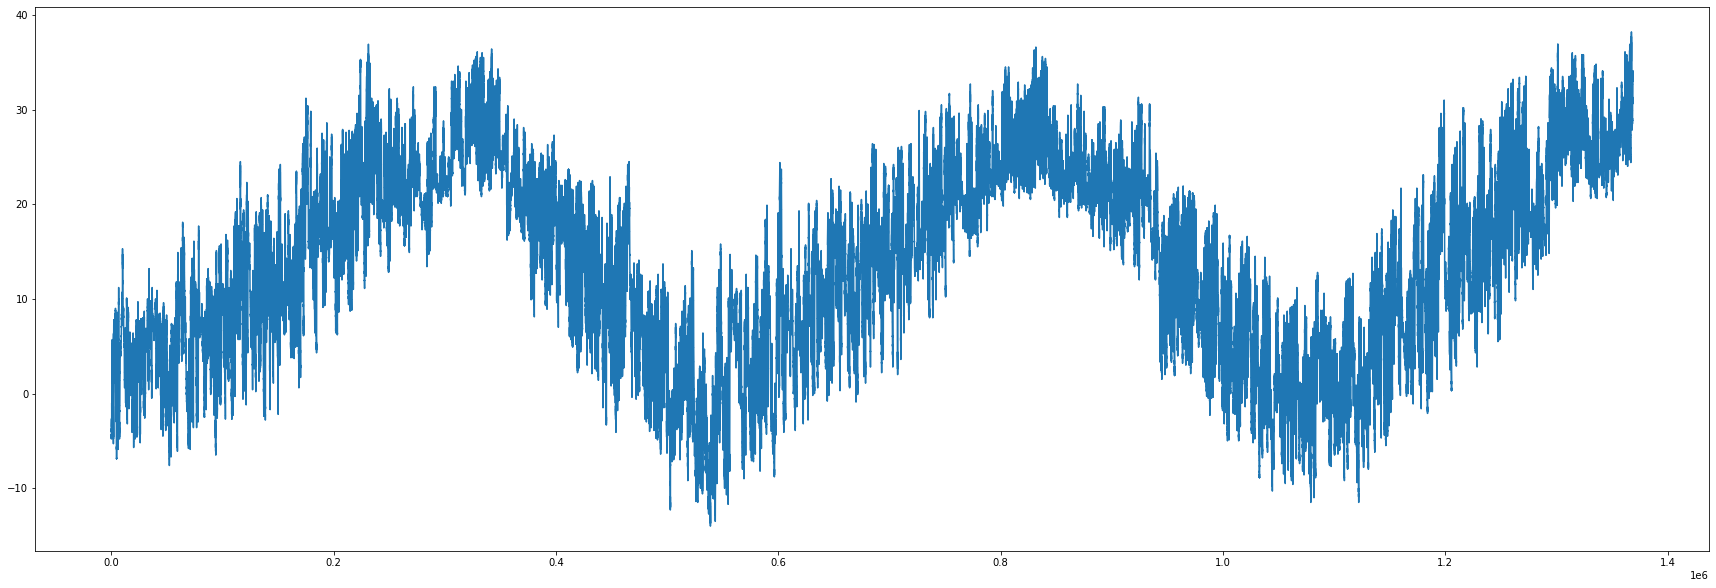

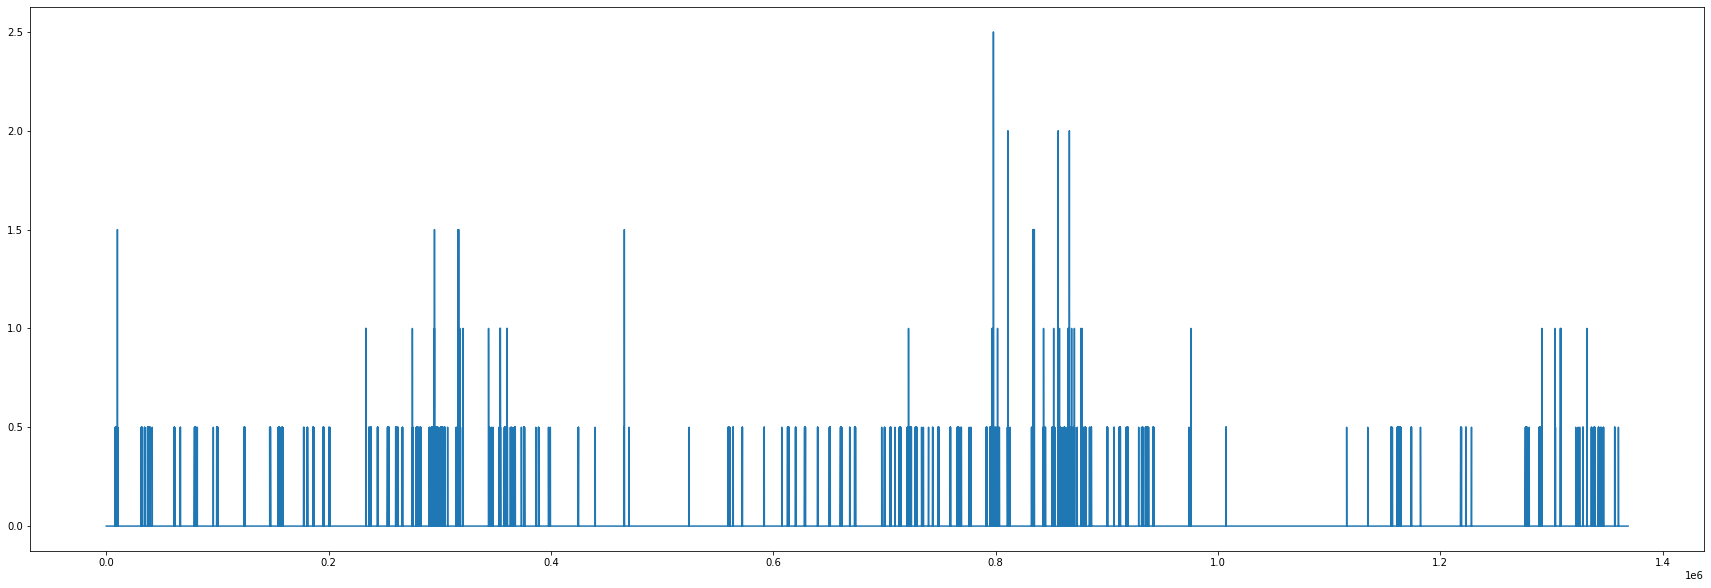

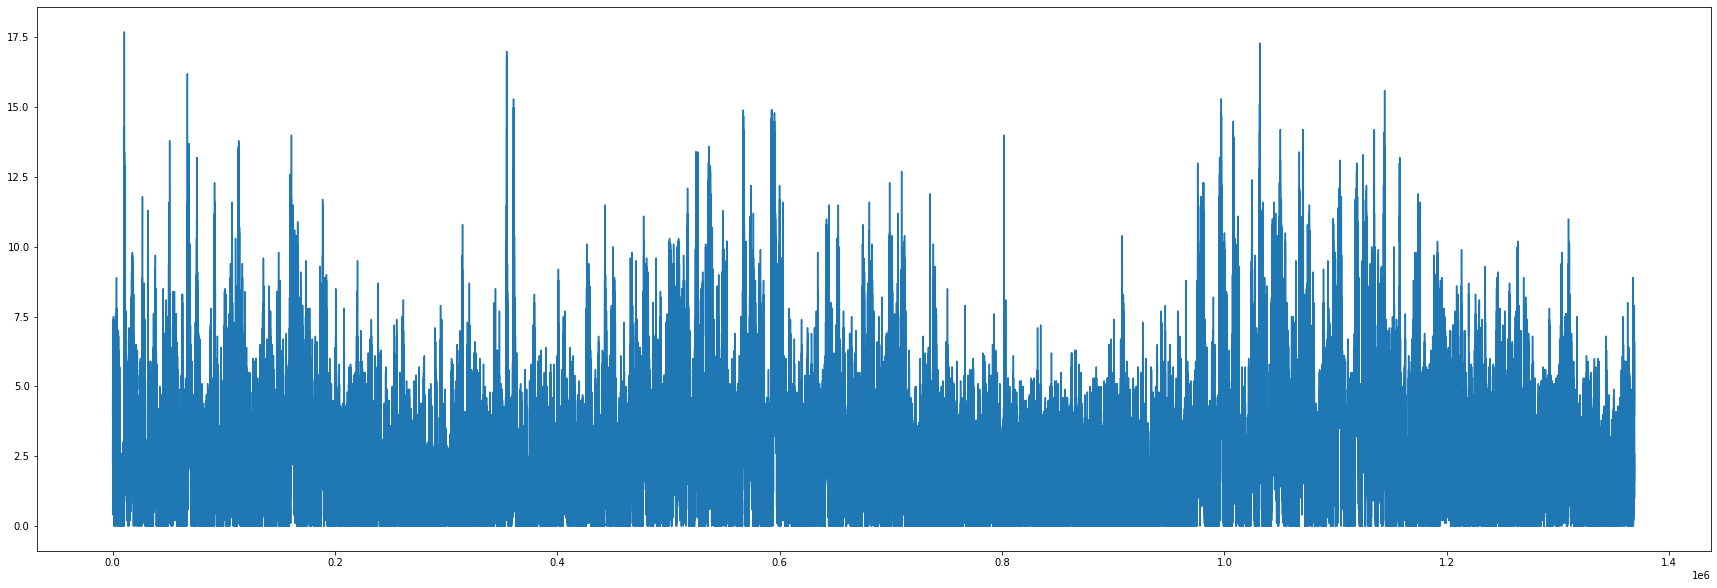

new directory is created!!! /content/drive/MyDrive/NIA_AIDEN_04/11월/11_12


In [ ]:

features = ['turbidity',	'EC',	'pH', 'water_temp', 'temp',	'precipitation',	'wind_velocity']
my_data = data[features]

work_count = [121, 118, 103, 170, 148, 111, 129, 107, 134, 122]

#work_date = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', 
#             '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']

work_date = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16','17']
#work_date = ['10', '12', '13', '15', '17', '19', '21', '22', '24', '28', '29', '30']
#work_date = ['20', '31', '30']
#work_date = ['02', '02', '02', '06', '15', '15', '12', '15']

### Here saving directory !!!
imonth_for_file = '11_'
imonth_for_dir = '11_'

creation_mon = '_2022' + imonth_for_file
file_loc = '/content/drive/MyDrive/NIA_AIDEN_04/11월/' 

with open(file_loc + input_file + '_task_summary.txt', 'w') as f:
    num_task = len(data)//2000
    content = "total amount of task %d \n" % num_task
    f.write(content)


### start task 2000 summary
try_count = 0
ichange = 0
cnt = 0

for i in range(len(my_data)//2000):

  start_int = i*2000
  end_int = (i+1)*2000
  start_str = f'{start_int}'
  end_str = f'{end_int}'
  surfix = start_str + '_' + end_str + '.xlsx'

  if cnt == 0:
    work_point = work_date[np.random.randint(0,17)]
    file_loc_date = file_loc + imonth_for_dir + work_point 

    if not os.path.exists(file_loc_date):
      creation_date = creation_mon + work_point + '_'
      os.makedirs(file_loc_date)
    else:
      new_dir = True
      while (new_dir):
        work_point = work_date[np.random.randint(0,17)]
        file_loc_date = file_loc + imonth_for_dir + work_point
        if not os.path.exists(file_loc_date):
          creation_date = creation_mon + work_point + '_'
          new_dir = False
      os.makedirs(file_loc_date)
  
    print('new directory is created!!!', file_loc_date)

  if cnt <= work_count[try_count]:
    my_path = file_loc_date + '/' + input_file + creation_date  + surfix
    block2check = my_data.loc[start_int:end_int,]
    my_data.describe().to_excel(my_path)
    cnt += 1

  else:
    work_num = [cnt]
    df = pd.DataFrame(work_num)
    df.to_excel(file_loc + input_file + creation_date  + 'work_amount.xlsx')
    for ftr in (features):
      plt.rcParams['figure.figsize'] = (30,10)
      fig=my_data[ftr].plot()
      fig = fig.get_figure()
      fig.savefig(file_loc_date +'/' + input_file + creation_date + '_feature_' + ftr + '.jpg')
      plt.show()
    cnt = 0
    try_count += 1
    if(try_count > 10):
      try_count = 0


my_data.describe().to_excel(file_loc + input_file + creation_date  + 'total_summary.xlsx')

